# 1. Import libraries



In [14]:

import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
#from catboost import CatBoostClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Import and read data

Now import and read the 3 datasets as outlined in the introduction.

In [15]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
# ss = pd.read_csv("gender_submission.csv")

train_copy = pd.read_csv("train.csv")
test_copy = pd.read_csv("test.csv")




Let's have a look at the datasets.

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
print("Training set shape: ", train.shape)
print("Test set shape: ", test.shape)

Training set shape:  (891, 12)
Test set shape:  (418, 11)


Note that the test set has one column less than training set, the Survived column. This is because Survived is our response variable, or sometimes called a target variable. Our job is to analyse the data in the training set and predict the survival of the passengers in the test set.

What about sample submission?

# 3. Data description

Here I will outline the definitions of the columns in the titanic dataset. You can find this information under the [data](https://www.kaggle.com/c/titanic/data) tab of the competition page.

- Survived: 0 = Did not survive, 1 = Survived

- Pclass: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.

- Sex: Male or female

- Age: Age in years, fractional if less than 1

- SibSp: Number of siblings or spouses aboard the titanic

- Parch: Number of parents or children aboard the titanic

- Ticket: Passenger ticket number

- Fare: Passenger fare

- Cabin: Cabin number

- Embarked: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton

# 4. Exploratory Data Analysis (EDA)

Exploratory data analysis is the process of visualising and analysing data to extract insights. In other words, we want to summarise important characteristics and trends in our data in order to gain a better understanding of our dataset.

## 4.1 Data types, missing data and summary statistics

In [19]:
# Non-null count and data types of the training and test set

train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [20]:
# Missing data in training set by columns

train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [21]:
# Missing data in test set by columns 

test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

Seems like Age, Cabin and Embarked colummns in the training set have missing data  while Age, Fare and Cabin in the test set have missing data. Another way to to diagnose this is via the missingno library.

<AxesSubplot:>

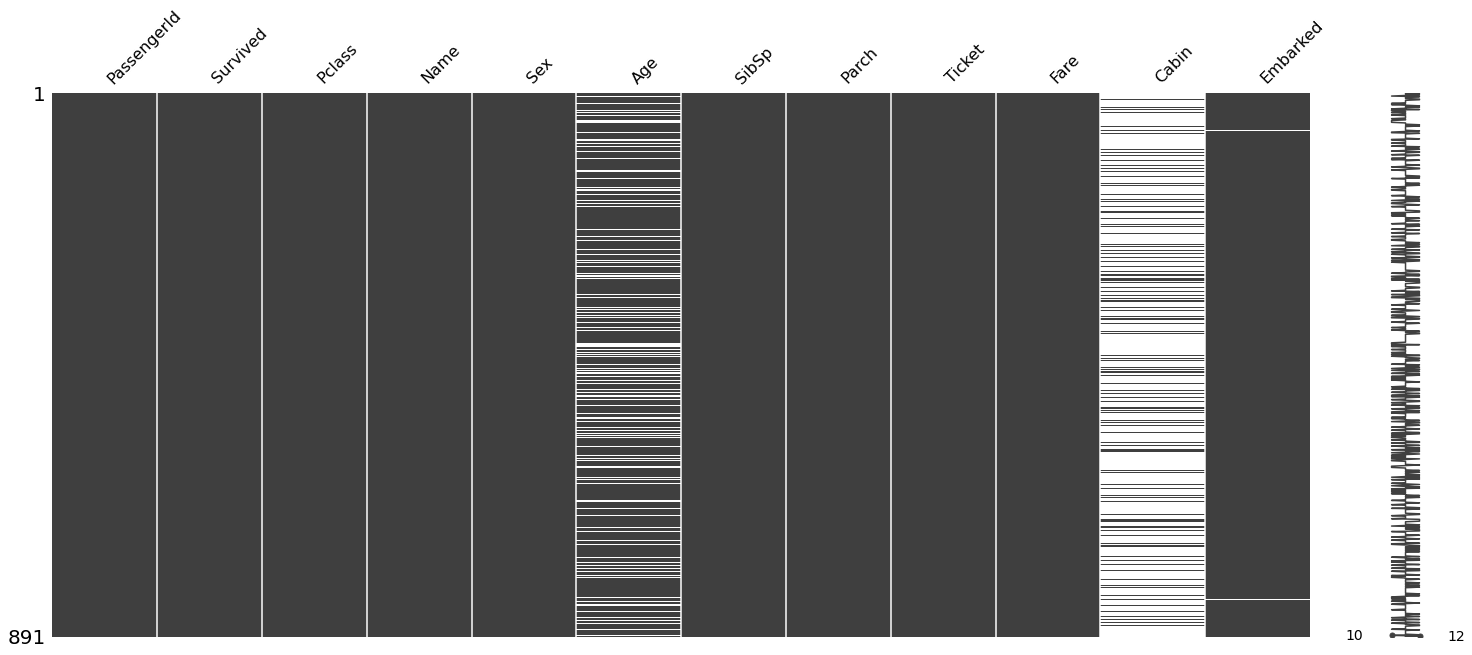

In [22]:
# Missing data in training set

missingno.matrix(train)

<AxesSubplot:>

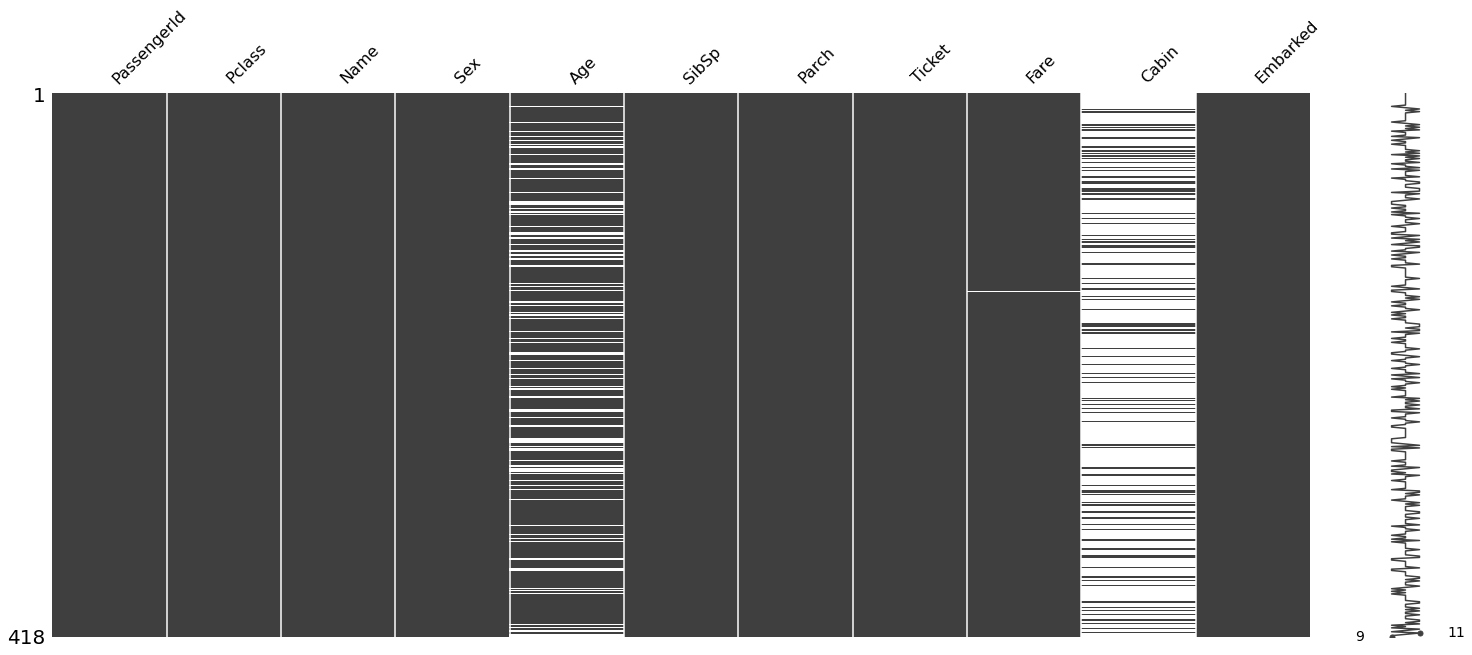

In [23]:
# Missing data in test set 

missingno.matrix(test)

In [24]:
# Summary statistics for training set 

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
# Summary statistics for test set 

test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 4.2 Feature analysis

A dataframe is made up of rows and columns. Number of rows correspond to the number of observations in our dataset whereas columns, sometimes called features, represent characteristics that help describe these observations. In our dataset, rows are the passengers on the titanic whereas columns are the features that describe the passengers like their age, gender etc.

Before we move on, it is also important to note the difference between a categorical variable and a numerical variable. Categorical variables, as the name suggests, have values belonging to one of two or more categories and there is usually no intrinsic ordering to these categories. An example of this in our data is the Sex feature. Every passenger is distinctly classified as either male or female. Numerical variables, on the other hand, have a continuous distribution. Some examples of numerical variables are the Age and Fare features.

Knowing if a feature is a numerical variable or categorical variable helps us structure our analysis more properly. For instance, it doesn't make sense to calculate the average of a categorical variable such as gender simply because gender is a binary classification and therefore has no intrinsic ordering to its values.

In this next section of the notebook, we will analyse the features in our dataset individually and see how they correlate with survival probability.

## 4.2.1 Categorical variables

Categorical variables in our dataset are Sex, Pclass and Embarked.

## Categorical variable: Sex

In [26]:
# Value counts of the sex column

train['Sex'].value_counts(dropna = False)

# Comment: There are more male passengers than female passengers on titanic

male      577
female    314
Name: Sex, dtype: int64

In [27]:
# Mean of survival by sex

train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

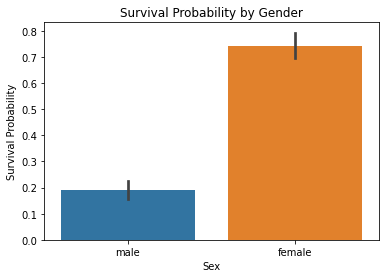

In [28]:
sns.barplot(x = 'Sex', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

# Comment: Female passengers are more likely to survive

## Categorical variable: Pclass

In [29]:
# Value counts of the Pclass column 

train['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [30]:
# Mean of survival by passenger class

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

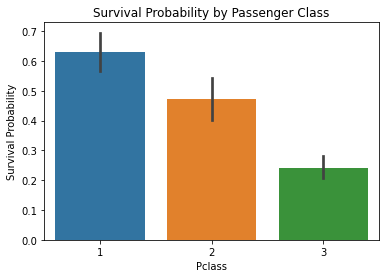

In [31]:
sns.barplot(x = 'Pclass', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

# Comment: Survival probability decrease with passenger class, first class passengers are prioritised during evacuation

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

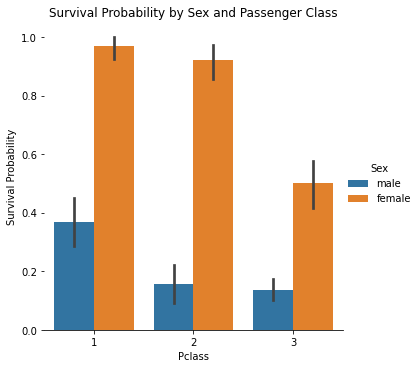

In [32]:
# Survival by gender and passenger class

g = sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train, kind = 'bar')
g.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

## Categorical variable: Embarked

In [33]:
# Value counts of the Embarked column 

train['Embarked'].value_counts(dropna = False)

# Comment: Two missing values in the Embarked column

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [34]:
# Mean of survival by point of embarkation

train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

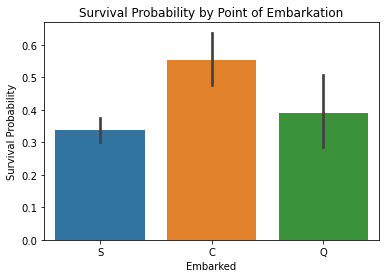

In [35]:
sns.barplot(x = 'Embarked', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

Survival probability is highest for location C and lowest for location S.

Is there a reason for this occurence? We can formulate a hypothesis whereby the majority of the first class passengers have embarked from location C and because they have a highest survival probability, this has resulted in location C having a highest survival probability. Alternatively, there could have been more third class passengers that embarked from location S and because they have the lowest survival probability, this has caused location S to have the lowest survival probability.

Let us now test this hypothesis.

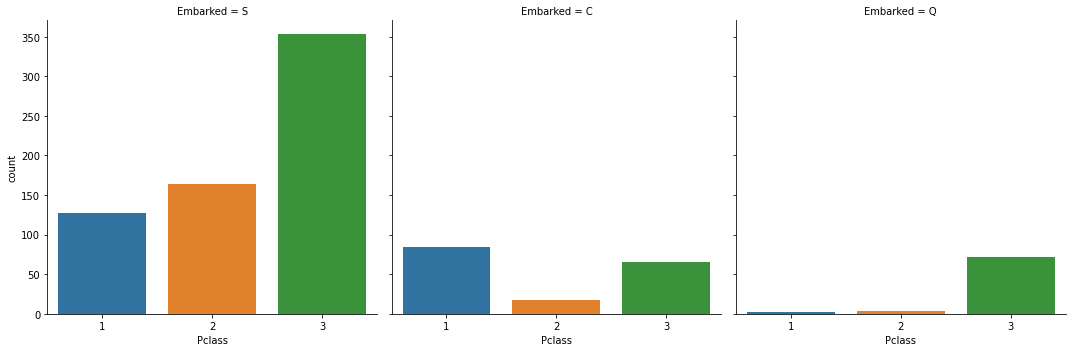

In [36]:
sns.factorplot('Pclass', col = 'Embarked', data = train, kind = 'count')

Our hypothesis appears to be true. Location S has the most third class passengers whereas location C has the most first class passengers. 

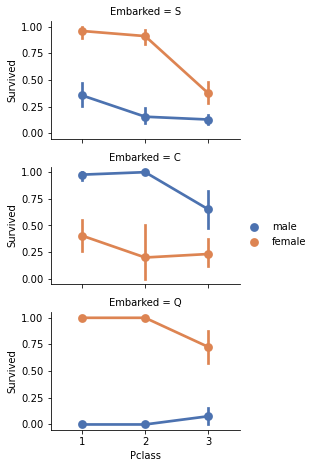

In [37]:
# Survival probability by all categorical variables

grid = sns.FacetGrid(train, row = 'Embarked', size = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

## 4.2.2 Numerical variables

Numerical variables in our dataset are SibSp, Parch, Age and Fare.

## Detect and remove outliers in numerical variables

Outliers are data points that have extreme values and they do not conform with the majority of the data. It is important to address this because outliers tend to skew our data towards extremes and can cause inaccurate model predictions. I will use the Tukey method to remove these outliers.

In [38]:
def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [39]:
# Outliers in numerical variables

train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [40]:
# Drop outliers and reset index

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


## Numerical variables correlation with survival

<AxesSubplot:>

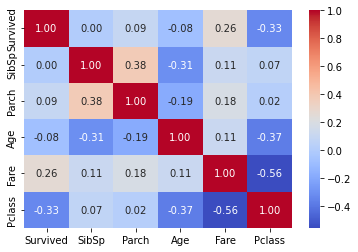

In [41]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare','Pclass']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')


# Comment: Fare seems to be the only feature that has a substantial correlation with survival

## Numerical variable: SibSp

In [42]:
# Value counts of the SibSp column 

train['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

In [43]:
# Mean of survival by SibSp

train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

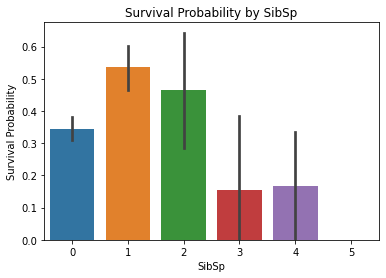

In [44]:
sns.barplot(x = 'SibSp', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

## Numerical variable: Parch

In [45]:
# Value counts of the Parch column 

train['Parch'].value_counts(dropna = False)

0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [46]:
# Mean of survival by Parch

train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

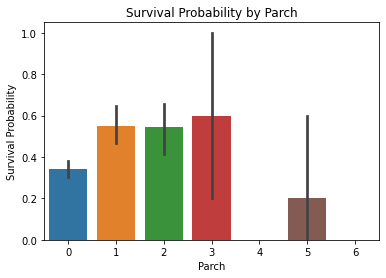

In [47]:
sns.barplot(x = 'Parch', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

## Numerical variable: Age

In [48]:
# Null values in Age column 

train['Age'].isnull().sum()

170

Text(0.5, 1.0, 'Passenger Age Distribution')

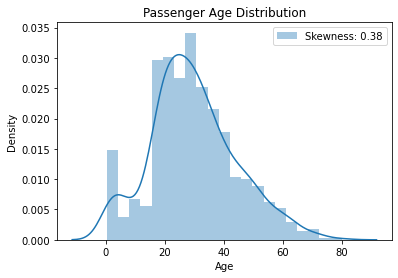

In [49]:
# Passenger age distribution

sns.distplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

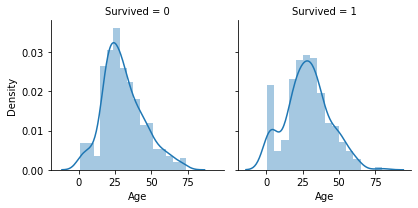

In [50]:
# Age distribution by survival

g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

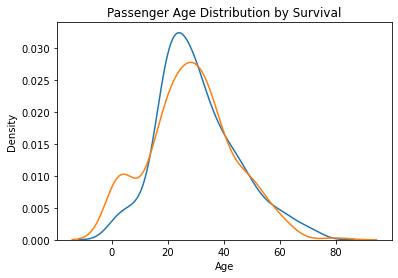

In [51]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

## Numerical variable: Fare

In [52]:
# Null values of Fare column 

train['Fare'].isnull().sum()

0

Text(0, 0.5, 'Passenger Fare Distribution')

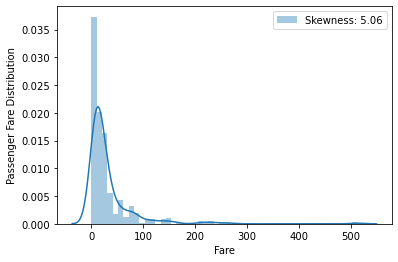

In [53]:
# Passenger fare distribution

sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

Fare seems to have a high skewness. We will address this issue later on in the notebook via log transformation. 

# 5. Data preprocessing

Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:

- Drop and fill missing values
- Data trasformation (log transformation)
- Feature engineering
- Feature encoding

## 5.1 Drop and fill missing values

In [54]:
# Drop ticket and cabin features from training and test set

train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

I have decided to drop both ticket and cabin for simplicity of this tutorial but if you have the time, I would recommend going through them and see if they can help improve your model.

In [55]:
# Missing values in training set 

train.isnull().sum().sort_values(ascending = False)

Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [56]:
# Compute the most frequent value of Embarked in training set

mode = train['Embarked'].dropna().mode()[0]
mode

'S'

In [57]:
# Fill missing value in Embarked with mode

train['Embarked'].fillna(mode, inplace = True)

In [58]:
# Missing values in test set

test.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [59]:
# Compute median of Fare in test set 

median = test['Fare'].dropna().median()
median

14.4542

In [60]:
# Fill missing value in Fare with median

test['Fare'].fillna(median, inplace = True)

In [61]:
# Combine training set and test set

combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [62]:
# Missing values in the combined dataset

combine.isnull().sum().sort_values(ascending = False)

Survived       418
Age            256
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

We can ignore missing values in the Survived column because all of them are from the test set. Now we need to fill missing values in the Age column.

The goal is to use features that are most correlated with Age to predict the values for Age. But first, we need to convert Sex into numerical values where 0 = male and 1 = female. This process is known as encoding and we will further explore this later in the notebook.

In [63]:
# Convert Sex into numerical values where 0 = male and 1 = female

combine['Sex'] = combine['Sex'].map({'male': 0, 'female': 1})

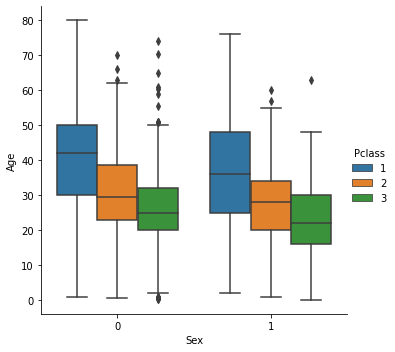

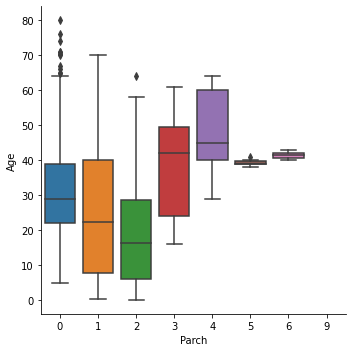

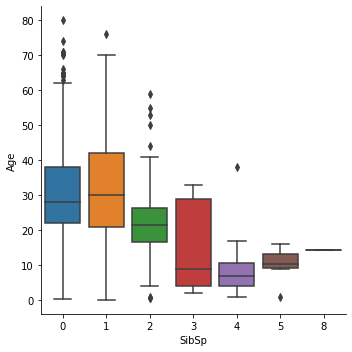

In [64]:
sns.factorplot(y = 'Age', x = 'Sex', hue = 'Pclass', kind = 'box', data = combine)
sns.factorplot(y = 'Age', x = 'Parch', kind = 'box', data = combine)
sns.factorplot(y = 'Age', x = 'SibSp', kind = 'box', data = combine)

<AxesSubplot:>

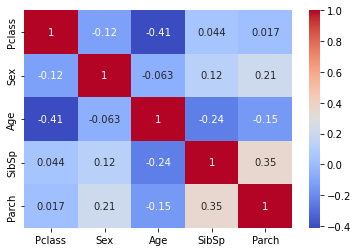

In [65]:
sns.heatmap(combine.drop(['Survived', 'Name', 'PassengerId', 'Fare'], axis = 1).corr(), annot = True, cmap = 'coolwarm')

Age is not correlated with Sex but is negatively correlated with SibSp, Parch and Pclass. 

In [66]:
# Check number of missing ages 

age_nan_indices = list(combine[combine['Age'].isnull()].index)
len(age_nan_indices)

256

Loop through each missing age in the list to locate the rows that have the same SibSp, Parch and PClass values and fill the missing age with the median of those rows. If rows are not found, simply fill the missing age with the median of the entire Age column.

In [67]:
# Loop through list and impute missing ages

for index in age_nan_indices:
    median_age = combine['Age'].median()
    predict_age = combine['Age'][(combine['SibSp'] == combine.iloc[index]['SibSp']) 
                                 & (combine['Parch'] == combine.iloc[index]['Parch'])
                                 & (combine['Pclass'] == combine.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        combine['Age'].iloc[index] = median_age
    else:
        combine['Age'].iloc[index] = predict_age

In [68]:
# Make sure there is no more missing ages 

combine['Age'].isnull().sum()

0

## 5.2 Data transformation

Recall that our passenger fare column has a very high positive skewness. Therefore, we will apply a log transformation to address this issue.

Text(0.5, 1.0, 'Passenger Fare Distribution')

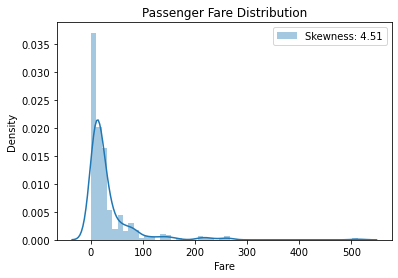

In [69]:
# Passenger fare distribution

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [70]:
# Apply log transformation to Fare column to reduce skewness

combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

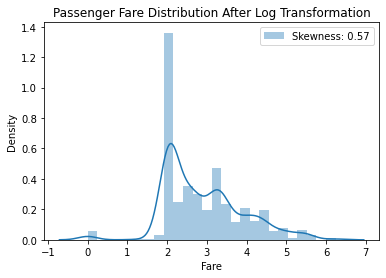

In [71]:
# Passenger fare distribution after log transformation

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

## 5.3 Feature engineering

Feature engineering is arguably the most important art in machine learning. It is the process of creating new features from existing features to better represent the underlying problem to the predictive models resulting in improved model accuracy on unseen data.

In this section, I will construct 3 new features:
- Title
- IsAlone
- Age*Class

## 5.3.1 Title

In [72]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [73]:
# Get title from name

combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [74]:
# Value counts of Title

combine['Title'].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [75]:
# Number of unique Title

combine['Title'].nunique()

18

In [76]:
# Simplify title

combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

<AxesSubplot:xlabel='Title', ylabel='count'>

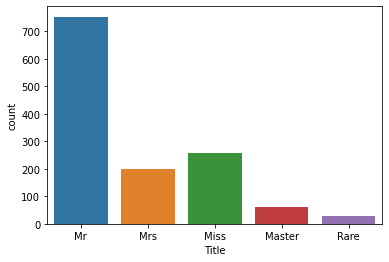

In [77]:
sns.countplot(combine['Title'])

In [78]:
# Mean of survival by name title

combine[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


Text(0.5, 1.0, 'Mean of survival by Title')

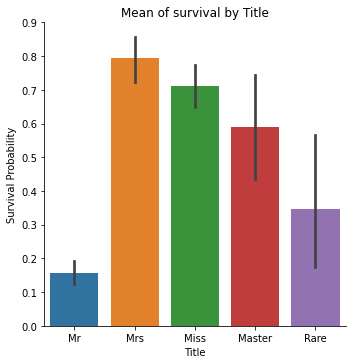

In [79]:
sns.factorplot(x = 'Title', y = 'Survived', data = combine, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')

In [80]:
# Drop name column

combine = combine.drop('Name', axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr


## 5.3.2 IsAlone

In [81]:
# Calculate family size from SibSp and Parch

combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [82]:
# Mean of survival by family size

combine[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000
8,11,NaN


In [83]:
# Create IsAlone feature

combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1

In [84]:
# Mean of survival by IsAlone

combine[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,IsAlone,Survived
0,0,0.514535
1,1,0.303538


In [85]:
# Drop SibSp, Parch and FamilySize features from combine dataframe

combine = combine.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,0,22.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,26.0,2.070022,S,Miss,1
3,4,1.0,1,1,35.0,3.972177,S,Mrs,0
4,5,0.0,3,0,35.0,2.085672,S,Mr,1


## 5.3.3 Age*Class

To create our new Age*Class feature, we need to first transform Age into an ordinal variable. Ordinal variable is much like a categorical variable but with intrisinc ordering in their values. 

We will group Ages into 5 separate age bands and assign a number to each age band.

In [86]:
# Create age bands and compute mean of survival by age bands

combine['AgeBand'] = pd.cut(combine['Age'], 5)
combine[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by = 'AgeBand')

,AgeBand,Survived
0,"(0.0902, 16.136]",0.532110
1,"(16.136, 32.102]",0.339662
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [87]:
# Assign ordinals to each age band 

combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034 , 'Age'] = 4

In [88]:
# Drop age band feature

combine = combine.drop('AgeBand', axis = 1)

In [89]:
# Age and Pclass data types 

combine[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [90]:
# Convert ordinal Age into integer

combine['Age'] = combine['Age'].astype('int')
combine['Age'].dtype

dtype('int64')

In [91]:
# Create Age*Class feature

combine['Age*Class'] = combine['Age'] * combine['Pclass']
combine[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


## 5.4 Feature encoding 

Machine learning models require all input and output variables to be numeric. Therefore, we need to encode all of our categorical data before we can fit the models to our data.

Previously, we have encoded the sex column such that 0 = male and 1 = female. We need to repeat this process for Title and Embarked. In addition, similar to the age column, I will also transform Fare into an ordinal variable rather than a continuous variable.

In [92]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0.0,3,0,1,1.981001,S,Mr,0,3
1,2,1.0,1,1,2,4.266662,C,Mrs,0,2
2,3,1.0,3,1,1,2.070022,S,Miss,1,3
3,4,1.0,1,1,2,3.972177,S,Mrs,0,2
4,5,0.0,3,0,2,2.085672,S,Mr,1,6


In [93]:
# Encode Title and Embarked feature

combine = pd.get_dummies(combine, columns = ['Title'])
combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em')
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1.981001,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,4.266662,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,2.070022,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,3.972177,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,2.085672,1,6,0,0,1,0,0,0,0,1


In [94]:
# Divide Fare into four bands

combine['FareBand'] = pd.cut(combine['Fare'], 4)
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517007
3,"(4.679, 6.239]",0.750000


In [95]:
# Assign ordinal to each fare band

combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3

In [96]:
# Convert Fare into integer

combine['Fare'] = combine['Fare'].astype('int')

In [97]:
# Drop FareBand feature

combine = combine.drop('FareBand', axis = 1)

In [98]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [99]:
# Separate training and test set from the combined dataframe

train = combine[:len(train)]
test = combine[len(train):]

In [100]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [101]:
# Drop passenger ID column from and training set

train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [102]:
# Convert survived back to integer in the training set

train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [103]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,NaN,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,NaN,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,NaN,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,NaN,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,NaN,3,1,1,1,0,3,0,0,0,1,0,0,0,1


In [104]:
# Drop passenger survived column from test set

test = test.drop('Survived', axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,3,1,1,1,0,3,0,0,0,1,0,0,0,1


Our dataframes are ready for modelling!

# 6. Modelling

Scikit-learn is one of the most popular libraries for machine learning in Python and that is what we will use in the modelling part of this project. 

Since Titanic is a classfication problem, we will need to use classfication models, also known as classifiers, to train on our model to make predictions. I highly recommend checking out this scikit-learn [documentation](https://scikit-learn.org/stable/index.html) for more information on the different machine learning models available in their library. I have chosen the following classifiers for the job:

- Logistic regression
- Support vector machines
- K-nearest neighbours
- Gaussian naive bayes
- Perceptron
- Linear SVC
- Stochastic gradient descent
- Decision tree
- Random forest
- CatBoost

In this section of the notebook, I will fit the models to the training set as outlined above and evaluate their accuracy at making predictions. Once the best model is determined, I will also do hyperparameter tuning to further boost the performance of the best model.

## 6.1 Split training data

We need to first split our training data into independent variables or predictor variables, represented by X as well as  dependent variable or response variable, represented by Y.

Y_train is the survived column in our training set and X_train is the other columns in the training set excluding the Survived column. Our models will learn to classify survival, Y_train based on all X_train and make predictions on X_test.

In [105]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 14)
Y_train shape:  (881,)
X_test shape:  (418, 14)


## 6.2 Fit model to data and make predictions

This requires 3 simple steps: instantiate the model, fit the model to the training set and predict the data in test set. 

## 6.2.1 Logistic regression

In [106]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.93

## 6.2.2 Support vector machines

In [107]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.09

## 6.2.3 K-nearest neighbours (KNN)

In [108]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.79

## 6.2.4 Gaussian naive bayes

In [109]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.11

## 6.2.5 Perceptron

In [110]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.57

## 6.2.6 Linear SVC

In [111]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.25

## 6.2.7 Stochastic gradient descent

In [112]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

78.21

## 6.2.8 Decision tree

In [113]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.7

## 6.2.9 Random forest

In [114]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.7

## 6.2.10 CatBoost

In [115]:
catboost = CatBoostClassifier()
catboost.fit(X_train, Y_train)
Y_pred = catboost.predict(X_test)
acc_catboost = round(catboost.score(X_train, Y_train) * 100, 2)

NameError: name 'CatBoostClassifier' is not defined

In [ ]:
acc_catboost

85.7

## 6.3 Model evaluation and hyperparameter tuning

Once all our models have been trained, the next step is to assess the performance of these models and select the one which has the highest prediction accuracy. 

## 6.3.1 Training accuracy

Training accuracy shows how well our model has learned from the training set. 

In [ ]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree', 'CatBoost'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree, acc_catboost]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,85.70
1,Decision Tree,85.70
2,CatBoost,85.70
3,KNN,84.79
4,Support Vector Machines,83.09
5,Logistic Regression,80.93
6,Linear SVC,80.25
7,Perceptron,79.57
8,Naive Bayes,79.11
9,Stochastic Gradient Decent,77.64


## 6.3.2 K-fold cross validation

It is important to not get too carried away with models with impressive training accuracy as what we should focus on instead is the model's ability to predict out-of-samples data, in other words, data our model has not seen before.

This is where k-fold cross validation comes in. K-fold cross validation is a technique whereby a subset of our training set is kept aside and will act as holdout set for testing purposes. Here is a great [video](https://www.youtube.com/watch?v=fSytzGwwBVw) explaining the concept in more detail. 

In [ ]:
# Create a list which contains classifiers 

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())

len(classifiers)

10

In [ ]:
# Create a list which contains cross validation results for each classifier

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))

Learning rate set to 0.009326
0:	learn: 0.6870194	total: 9.98ms	remaining: 9.97s
1:	learn: 0.6803219	total: 13.5ms	remaining: 6.75s
2:	learn: 0.6736531	total: 17ms	remaining: 5.66s
3:	learn: 0.6678130	total: 20.6ms	remaining: 5.13s
4:	learn: 0.6618130	total: 24.3ms	remaining: 4.84s
5:	learn: 0.6563633	total: 27.9ms	remaining: 4.62s
6:	learn: 0.6509528	total: 31.5ms	remaining: 4.47s
7:	learn: 0.6449930	total: 35ms	remaining: 4.34s
8:	learn: 0.6411853	total: 38ms	remaining: 4.19s
9:	learn: 0.6366148	total: 41.5ms	remaining: 4.11s
10:	learn: 0.6321141	total: 45.1ms	remaining: 4.05s
11:	learn: 0.6282605	total: 48.6ms	remaining: 4s
12:	learn: 0.6236975	total: 51.8ms	remaining: 3.93s
13:	learn: 0.6184334	total: 55.3ms	remaining: 3.9s
14:	learn: 0.6132588	total: 59.2ms	remaining: 3.89s
15:	learn: 0.6105914	total: 61.6ms	remaining: 3.79s
16:	learn: 0.6060713	total: 65.2ms	remaining: 3.77s
17:	learn: 0.6013206	total: 68.7ms	remaining: 3.75s
18:	learn: 0.5966578	total: 72.5ms	remaining: 3.74s
19

180:	learn: 0.3856869	total: 719ms	remaining: 3.25s
181:	learn: 0.3853330	total: 723ms	remaining: 3.25s
182:	learn: 0.3851762	total: 727ms	remaining: 3.25s
183:	learn: 0.3847312	total: 731ms	remaining: 3.24s
184:	learn: 0.3843651	total: 735ms	remaining: 3.24s
185:	learn: 0.3840513	total: 739ms	remaining: 3.23s
186:	learn: 0.3838640	total: 743ms	remaining: 3.23s
187:	learn: 0.3835612	total: 747ms	remaining: 3.23s
188:	learn: 0.3832816	total: 751ms	remaining: 3.22s
189:	learn: 0.3830177	total: 755ms	remaining: 3.22s
190:	learn: 0.3826469	total: 759ms	remaining: 3.22s
191:	learn: 0.3825702	total: 762ms	remaining: 3.21s
192:	learn: 0.3822077	total: 766ms	remaining: 3.2s
193:	learn: 0.3818039	total: 770ms	remaining: 3.2s
194:	learn: 0.3816018	total: 773ms	remaining: 3.19s
195:	learn: 0.3812526	total: 777ms	remaining: 3.19s
196:	learn: 0.3809560	total: 782ms	remaining: 3.19s
197:	learn: 0.3806978	total: 786ms	remaining: 3.18s
198:	learn: 0.3804248	total: 790ms	remaining: 3.18s
199:	learn: 0.

370:	learn: 0.3557834	total: 1.44s	remaining: 2.45s
371:	learn: 0.3556727	total: 1.45s	remaining: 2.44s
372:	learn: 0.3555709	total: 1.45s	remaining: 2.44s
373:	learn: 0.3555113	total: 1.46s	remaining: 2.44s
374:	learn: 0.3553775	total: 1.46s	remaining: 2.43s
375:	learn: 0.3552775	total: 1.46s	remaining: 2.43s
376:	learn: 0.3552154	total: 1.47s	remaining: 2.42s
377:	learn: 0.3551255	total: 1.47s	remaining: 2.42s
378:	learn: 0.3550902	total: 1.47s	remaining: 2.42s
379:	learn: 0.3550213	total: 1.48s	remaining: 2.41s
380:	learn: 0.3549489	total: 1.48s	remaining: 2.41s
381:	learn: 0.3548449	total: 1.49s	remaining: 2.4s
382:	learn: 0.3547658	total: 1.49s	remaining: 2.4s
383:	learn: 0.3546612	total: 1.49s	remaining: 2.4s
384:	learn: 0.3545737	total: 1.5s	remaining: 2.39s
385:	learn: 0.3544860	total: 1.5s	remaining: 2.39s
386:	learn: 0.3543931	total: 1.5s	remaining: 2.38s
387:	learn: 0.3543143	total: 1.51s	remaining: 2.38s
388:	learn: 0.3541963	total: 1.51s	remaining: 2.38s
389:	learn: 0.3541

532:	learn: 0.3447251	total: 2.03s	remaining: 1.78s
533:	learn: 0.3446611	total: 2.03s	remaining: 1.77s
534:	learn: 0.3445922	total: 2.04s	remaining: 1.77s
535:	learn: 0.3445594	total: 2.04s	remaining: 1.76s
536:	learn: 0.3444875	total: 2.04s	remaining: 1.76s
537:	learn: 0.3444012	total: 2.05s	remaining: 1.76s
538:	learn: 0.3443614	total: 2.05s	remaining: 1.75s
539:	learn: 0.3442298	total: 2.05s	remaining: 1.75s
540:	learn: 0.3441314	total: 2.06s	remaining: 1.75s
541:	learn: 0.3440657	total: 2.06s	remaining: 1.74s
542:	learn: 0.3440386	total: 2.06s	remaining: 1.74s
543:	learn: 0.3440109	total: 2.07s	remaining: 1.73s
544:	learn: 0.3439504	total: 2.07s	remaining: 1.73s
545:	learn: 0.3439079	total: 2.08s	remaining: 1.73s
546:	learn: 0.3439003	total: 2.08s	remaining: 1.72s
547:	learn: 0.3438919	total: 2.08s	remaining: 1.72s
548:	learn: 0.3438791	total: 2.08s	remaining: 1.71s
549:	learn: 0.3438145	total: 2.09s	remaining: 1.71s
550:	learn: 0.3438002	total: 2.09s	remaining: 1.71s
551:	learn: 

692:	learn: 0.3366553	total: 2.61s	remaining: 1.16s
693:	learn: 0.3366258	total: 2.62s	remaining: 1.15s
694:	learn: 0.3365505	total: 2.62s	remaining: 1.15s
695:	learn: 0.3365167	total: 2.63s	remaining: 1.15s
696:	learn: 0.3364868	total: 2.63s	remaining: 1.14s
697:	learn: 0.3364685	total: 2.64s	remaining: 1.14s
698:	learn: 0.3364292	total: 2.65s	remaining: 1.14s
699:	learn: 0.3363900	total: 2.65s	remaining: 1.14s
700:	learn: 0.3363649	total: 2.65s	remaining: 1.13s
701:	learn: 0.3363290	total: 2.66s	remaining: 1.13s
702:	learn: 0.3363099	total: 2.66s	remaining: 1.12s
703:	learn: 0.3362666	total: 2.67s	remaining: 1.12s
704:	learn: 0.3362071	total: 2.67s	remaining: 1.12s
705:	learn: 0.3361612	total: 2.67s	remaining: 1.11s
706:	learn: 0.3361289	total: 2.68s	remaining: 1.11s
707:	learn: 0.3360888	total: 2.68s	remaining: 1.11s
708:	learn: 0.3360361	total: 2.69s	remaining: 1.1s
709:	learn: 0.3360052	total: 2.69s	remaining: 1.1s
710:	learn: 0.3359409	total: 2.7s	remaining: 1.1s
711:	learn: 0.33

876:	learn: 0.3284391	total: 3.36s	remaining: 471ms
877:	learn: 0.3283900	total: 3.36s	remaining: 467ms
878:	learn: 0.3283550	total: 3.36s	remaining: 463ms
879:	learn: 0.3283143	total: 3.37s	remaining: 459ms
880:	learn: 0.3282719	total: 3.37s	remaining: 455ms
881:	learn: 0.3282353	total: 3.38s	remaining: 452ms
882:	learn: 0.3281635	total: 3.38s	remaining: 448ms
883:	learn: 0.3281159	total: 3.38s	remaining: 444ms
884:	learn: 0.3281015	total: 3.39s	remaining: 440ms
885:	learn: 0.3280465	total: 3.39s	remaining: 437ms
886:	learn: 0.3280078	total: 3.4s	remaining: 433ms
887:	learn: 0.3279568	total: 3.41s	remaining: 430ms
888:	learn: 0.3279263	total: 3.42s	remaining: 427ms
889:	learn: 0.3278955	total: 3.42s	remaining: 423ms
890:	learn: 0.3278415	total: 3.42s	remaining: 419ms
891:	learn: 0.3278090	total: 3.43s	remaining: 415ms
892:	learn: 0.3277735	total: 3.43s	remaining: 411ms
893:	learn: 0.3277219	total: 3.43s	remaining: 407ms
894:	learn: 0.3276838	total: 3.44s	remaining: 403ms
895:	learn: 0

37:	learn: 0.5350951	total: 130ms	remaining: 3.3s
38:	learn: 0.5317838	total: 134ms	remaining: 3.31s
39:	learn: 0.5291643	total: 138ms	remaining: 3.31s
40:	learn: 0.5258912	total: 142ms	remaining: 3.31s
41:	learn: 0.5236558	total: 145ms	remaining: 3.3s
42:	learn: 0.5209055	total: 148ms	remaining: 3.3s
43:	learn: 0.5185128	total: 153ms	remaining: 3.31s
44:	learn: 0.5161516	total: 156ms	remaining: 3.31s
45:	learn: 0.5133951	total: 159ms	remaining: 3.31s
46:	learn: 0.5111628	total: 164ms	remaining: 3.32s
47:	learn: 0.5093280	total: 167ms	remaining: 3.32s
48:	learn: 0.5069884	total: 172ms	remaining: 3.33s
49:	learn: 0.5043250	total: 176ms	remaining: 3.33s
50:	learn: 0.5018241	total: 180ms	remaining: 3.35s
51:	learn: 0.4995885	total: 184ms	remaining: 3.35s
52:	learn: 0.4972529	total: 188ms	remaining: 3.36s
53:	learn: 0.4953334	total: 195ms	remaining: 3.41s
54:	learn: 0.4935411	total: 198ms	remaining: 3.4s
55:	learn: 0.4915206	total: 201ms	remaining: 3.4s
56:	learn: 0.4893392	total: 205ms	re

235:	learn: 0.3787278	total: 860ms	remaining: 2.78s
236:	learn: 0.3786709	total: 864ms	remaining: 2.78s
237:	learn: 0.3785107	total: 867ms	remaining: 2.78s
238:	learn: 0.3783630	total: 871ms	remaining: 2.77s
239:	learn: 0.3781950	total: 874ms	remaining: 2.77s
240:	learn: 0.3780336	total: 879ms	remaining: 2.77s
241:	learn: 0.3778656	total: 882ms	remaining: 2.76s
242:	learn: 0.3776506	total: 886ms	remaining: 2.76s
243:	learn: 0.3775347	total: 890ms	remaining: 2.76s
244:	learn: 0.3773475	total: 894ms	remaining: 2.75s
245:	learn: 0.3772592	total: 897ms	remaining: 2.75s
246:	learn: 0.3770420	total: 901ms	remaining: 2.75s
247:	learn: 0.3767716	total: 905ms	remaining: 2.74s
248:	learn: 0.3766601	total: 909ms	remaining: 2.74s
249:	learn: 0.3764183	total: 912ms	remaining: 2.74s
250:	learn: 0.3762242	total: 916ms	remaining: 2.73s
251:	learn: 0.3761889	total: 919ms	remaining: 2.73s
252:	learn: 0.3760632	total: 923ms	remaining: 2.72s
253:	learn: 0.3760333	total: 927ms	remaining: 2.72s
254:	learn: 

394:	learn: 0.3603783	total: 1.44s	remaining: 2.21s
395:	learn: 0.3602766	total: 1.45s	remaining: 2.21s
396:	learn: 0.3602503	total: 1.45s	remaining: 2.21s
397:	learn: 0.3601892	total: 1.46s	remaining: 2.2s
398:	learn: 0.3601269	total: 1.46s	remaining: 2.2s
399:	learn: 0.3600201	total: 1.46s	remaining: 2.19s
400:	learn: 0.3598891	total: 1.47s	remaining: 2.19s
401:	learn: 0.3598085	total: 1.47s	remaining: 2.19s
402:	learn: 0.3597876	total: 1.47s	remaining: 2.18s
403:	learn: 0.3596499	total: 1.48s	remaining: 2.18s
404:	learn: 0.3595887	total: 1.48s	remaining: 2.18s
405:	learn: 0.3594716	total: 1.49s	remaining: 2.17s
406:	learn: 0.3594137	total: 1.49s	remaining: 2.17s
407:	learn: 0.3593970	total: 1.49s	remaining: 2.16s
408:	learn: 0.3593945	total: 1.49s	remaining: 2.16s
409:	learn: 0.3593203	total: 1.5s	remaining: 2.15s
410:	learn: 0.3592844	total: 1.5s	remaining: 2.15s
411:	learn: 0.3592022	total: 1.5s	remaining: 2.15s
412:	learn: 0.3591351	total: 1.51s	remaining: 2.15s
413:	learn: 0.359

555:	learn: 0.3500890	total: 2.03s	remaining: 1.62s
556:	learn: 0.3500183	total: 2.03s	remaining: 1.62s
557:	learn: 0.3500155	total: 2.04s	remaining: 1.61s
558:	learn: 0.3499745	total: 2.04s	remaining: 1.61s
559:	learn: 0.3498980	total: 2.05s	remaining: 1.61s
560:	learn: 0.3498778	total: 2.05s	remaining: 1.6s
561:	learn: 0.3497806	total: 2.05s	remaining: 1.6s
562:	learn: 0.3496759	total: 2.06s	remaining: 1.6s
563:	learn: 0.3496422	total: 2.06s	remaining: 1.59s
564:	learn: 0.3496130	total: 2.06s	remaining: 1.59s
565:	learn: 0.3495905	total: 2.07s	remaining: 1.59s
566:	learn: 0.3494562	total: 2.07s	remaining: 1.58s
567:	learn: 0.3494225	total: 2.08s	remaining: 1.58s
568:	learn: 0.3493711	total: 2.08s	remaining: 1.57s
569:	learn: 0.3493510	total: 2.08s	remaining: 1.57s
570:	learn: 0.3492628	total: 2.09s	remaining: 1.57s
571:	learn: 0.3492254	total: 2.09s	remaining: 1.56s
572:	learn: 0.3492253	total: 2.1s	remaining: 1.56s
573:	learn: 0.3491436	total: 2.1s	remaining: 1.56s
574:	learn: 0.349

715:	learn: 0.3426408	total: 2.61s	remaining: 1.03s
716:	learn: 0.3425895	total: 2.62s	remaining: 1.03s
717:	learn: 0.3425391	total: 2.62s	remaining: 1.03s
718:	learn: 0.3424864	total: 2.62s	remaining: 1.02s
719:	learn: 0.3424522	total: 2.63s	remaining: 1.02s
720:	learn: 0.3423534	total: 2.63s	remaining: 1.02s
721:	learn: 0.3422854	total: 2.63s	remaining: 1.01s
722:	learn: 0.3422291	total: 2.64s	remaining: 1.01s
723:	learn: 0.3421847	total: 2.64s	remaining: 1.01s
724:	learn: 0.3420845	total: 2.65s	remaining: 1s
725:	learn: 0.3420472	total: 2.65s	remaining: 1000ms
726:	learn: 0.3419747	total: 2.65s	remaining: 996ms
727:	learn: 0.3419392	total: 2.66s	remaining: 993ms
728:	learn: 0.3419126	total: 2.66s	remaining: 989ms
729:	learn: 0.3418561	total: 2.66s	remaining: 985ms
730:	learn: 0.3418032	total: 2.67s	remaining: 982ms
731:	learn: 0.3417470	total: 2.67s	remaining: 978ms
732:	learn: 0.3416865	total: 2.68s	remaining: 975ms
733:	learn: 0.3416279	total: 2.68s	remaining: 971ms
734:	learn: 0.

906:	learn: 0.3339729	total: 3.35s	remaining: 343ms
907:	learn: 0.3339291	total: 3.35s	remaining: 340ms
908:	learn: 0.3338784	total: 3.36s	remaining: 336ms
909:	learn: 0.3338387	total: 3.36s	remaining: 332ms
910:	learn: 0.3337978	total: 3.36s	remaining: 329ms
911:	learn: 0.3337668	total: 3.37s	remaining: 325ms
912:	learn: 0.3337285	total: 3.37s	remaining: 321ms
913:	learn: 0.3337066	total: 3.38s	remaining: 318ms
914:	learn: 0.3336663	total: 3.38s	remaining: 314ms
915:	learn: 0.3336255	total: 3.38s	remaining: 310ms
916:	learn: 0.3335997	total: 3.39s	remaining: 307ms
917:	learn: 0.3335584	total: 3.39s	remaining: 303ms
918:	learn: 0.3335227	total: 3.39s	remaining: 299ms
919:	learn: 0.3334984	total: 3.4s	remaining: 295ms
920:	learn: 0.3334735	total: 3.4s	remaining: 292ms
921:	learn: 0.3334411	total: 3.4s	remaining: 288ms
922:	learn: 0.3334056	total: 3.41s	remaining: 284ms
923:	learn: 0.3333820	total: 3.41s	remaining: 281ms
924:	learn: 0.3333354	total: 3.42s	remaining: 277ms
925:	learn: 0.3

71:	learn: 0.4471159	total: 287ms	remaining: 3.7s
72:	learn: 0.4458240	total: 291ms	remaining: 3.7s
73:	learn: 0.4445687	total: 295ms	remaining: 3.69s
74:	learn: 0.4427444	total: 299ms	remaining: 3.69s
75:	learn: 0.4420185	total: 302ms	remaining: 3.67s
76:	learn: 0.4408932	total: 306ms	remaining: 3.66s
77:	learn: 0.4395350	total: 309ms	remaining: 3.66s
78:	learn: 0.4377709	total: 313ms	remaining: 3.65s
79:	learn: 0.4371382	total: 316ms	remaining: 3.63s
80:	learn: 0.4356683	total: 319ms	remaining: 3.62s
81:	learn: 0.4347217	total: 323ms	remaining: 3.61s
82:	learn: 0.4333024	total: 327ms	remaining: 3.61s
83:	learn: 0.4317514	total: 331ms	remaining: 3.61s
84:	learn: 0.4302396	total: 335ms	remaining: 3.6s
85:	learn: 0.4296607	total: 338ms	remaining: 3.59s
86:	learn: 0.4283208	total: 342ms	remaining: 3.59s
87:	learn: 0.4266466	total: 346ms	remaining: 3.58s
88:	learn: 0.4255315	total: 350ms	remaining: 3.58s
89:	learn: 0.4243369	total: 354ms	remaining: 3.58s
90:	learn: 0.4238965	total: 357ms	

267:	learn: 0.3513408	total: 1.02s	remaining: 2.78s
268:	learn: 0.3510816	total: 1.02s	remaining: 2.78s
269:	learn: 0.3508920	total: 1.03s	remaining: 2.78s
270:	learn: 0.3507689	total: 1.03s	remaining: 2.77s
271:	learn: 0.3506820	total: 1.03s	remaining: 2.77s
272:	learn: 0.3505393	total: 1.04s	remaining: 2.77s
273:	learn: 0.3504879	total: 1.04s	remaining: 2.76s
274:	learn: 0.3502222	total: 1.04s	remaining: 2.76s
275:	learn: 0.3501402	total: 1.05s	remaining: 2.75s
276:	learn: 0.3499766	total: 1.05s	remaining: 2.75s
277:	learn: 0.3498445	total: 1.06s	remaining: 2.75s
278:	learn: 0.3497485	total: 1.06s	remaining: 2.74s
279:	learn: 0.3495690	total: 1.06s	remaining: 2.74s
280:	learn: 0.3495571	total: 1.07s	remaining: 2.73s
281:	learn: 0.3494111	total: 1.07s	remaining: 2.73s
282:	learn: 0.3493228	total: 1.07s	remaining: 2.72s
283:	learn: 0.3492487	total: 1.08s	remaining: 2.72s
284:	learn: 0.3490468	total: 1.08s	remaining: 2.72s
285:	learn: 0.3487714	total: 1.09s	remaining: 2.71s
286:	learn: 

464:	learn: 0.3335057	total: 1.75s	remaining: 2.01s
465:	learn: 0.3334856	total: 1.75s	remaining: 2.01s
466:	learn: 0.3334745	total: 1.76s	remaining: 2s
467:	learn: 0.3334361	total: 1.76s	remaining: 2s
468:	learn: 0.3333259	total: 1.76s	remaining: 2s
469:	learn: 0.3333230	total: 1.77s	remaining: 1.99s
470:	learn: 0.3333091	total: 1.77s	remaining: 1.99s
471:	learn: 0.3332324	total: 1.77s	remaining: 1.99s
472:	learn: 0.3332205	total: 1.78s	remaining: 1.98s
473:	learn: 0.3331571	total: 1.78s	remaining: 1.98s
474:	learn: 0.3331018	total: 1.79s	remaining: 1.97s
475:	learn: 0.3330742	total: 1.79s	remaining: 1.97s
476:	learn: 0.3330167	total: 1.79s	remaining: 1.97s
477:	learn: 0.3329803	total: 1.8s	remaining: 1.96s
478:	learn: 0.3329270	total: 1.8s	remaining: 1.96s
479:	learn: 0.3328023	total: 1.8s	remaining: 1.96s
480:	learn: 0.3327241	total: 1.81s	remaining: 1.95s
481:	learn: 0.3326591	total: 1.81s	remaining: 1.95s
482:	learn: 0.3326386	total: 1.82s	remaining: 1.94s
483:	learn: 0.3326000	to

623:	learn: 0.3250229	total: 2.34s	remaining: 1.41s
624:	learn: 0.3249922	total: 2.34s	remaining: 1.4s
625:	learn: 0.3249797	total: 2.34s	remaining: 1.4s
626:	learn: 0.3249294	total: 2.35s	remaining: 1.4s
627:	learn: 0.3248269	total: 2.35s	remaining: 1.39s
628:	learn: 0.3247874	total: 2.35s	remaining: 1.39s
629:	learn: 0.3247573	total: 2.36s	remaining: 1.39s
630:	learn: 0.3246969	total: 2.36s	remaining: 1.38s
631:	learn: 0.3246230	total: 2.37s	remaining: 1.38s
632:	learn: 0.3245667	total: 2.37s	remaining: 1.37s
633:	learn: 0.3245291	total: 2.38s	remaining: 1.37s
634:	learn: 0.3244823	total: 2.38s	remaining: 1.37s
635:	learn: 0.3244366	total: 2.38s	remaining: 1.36s
636:	learn: 0.3244039	total: 2.39s	remaining: 1.36s
637:	learn: 0.3243525	total: 2.39s	remaining: 1.36s
638:	learn: 0.3243457	total: 2.39s	remaining: 1.35s
639:	learn: 0.3243347	total: 2.4s	remaining: 1.35s
640:	learn: 0.3243162	total: 2.4s	remaining: 1.34s
641:	learn: 0.3242334	total: 2.4s	remaining: 1.34s
642:	learn: 0.3241

819:	learn: 0.3167325	total: 3.07s	remaining: 674ms
820:	learn: 0.3167039	total: 3.07s	remaining: 670ms
821:	learn: 0.3166616	total: 3.08s	remaining: 666ms
822:	learn: 0.3166272	total: 3.08s	remaining: 663ms
823:	learn: 0.3165844	total: 3.08s	remaining: 659ms
824:	learn: 0.3165426	total: 3.09s	remaining: 655ms
825:	learn: 0.3165013	total: 3.09s	remaining: 651ms
826:	learn: 0.3164094	total: 3.1s	remaining: 648ms
827:	learn: 0.3163897	total: 3.1s	remaining: 644ms
828:	learn: 0.3163644	total: 3.1s	remaining: 640ms
829:	learn: 0.3162894	total: 3.11s	remaining: 636ms
830:	learn: 0.3162555	total: 3.11s	remaining: 633ms
831:	learn: 0.3162476	total: 3.12s	remaining: 629ms
832:	learn: 0.3162001	total: 3.12s	remaining: 625ms
833:	learn: 0.3161689	total: 3.12s	remaining: 621ms
834:	learn: 0.3160926	total: 3.13s	remaining: 618ms
835:	learn: 0.3160845	total: 3.13s	remaining: 614ms
836:	learn: 0.3160659	total: 3.13s	remaining: 610ms
837:	learn: 0.3160221	total: 3.14s	remaining: 607ms
838:	learn: 0.3

Learning rate set to 0.009331
0:	learn: 0.6875366	total: 7.78ms	remaining: 7.77s
1:	learn: 0.6822047	total: 13.8ms	remaining: 6.87s
2:	learn: 0.6787845	total: 19.9ms	remaining: 6.61s
3:	learn: 0.6736586	total: 25ms	remaining: 6.23s
4:	learn: 0.6674820	total: 29.4ms	remaining: 5.85s
5:	learn: 0.6627471	total: 33.7ms	remaining: 5.58s
6:	learn: 0.6571166	total: 38.3ms	remaining: 5.43s
7:	learn: 0.6515700	total: 42.8ms	remaining: 5.31s
8:	learn: 0.6464040	total: 46.3ms	remaining: 5.1s
9:	learn: 0.6409371	total: 49.8ms	remaining: 4.93s
10:	learn: 0.6364860	total: 53ms	remaining: 4.76s
11:	learn: 0.6322902	total: 55.9ms	remaining: 4.6s
12:	learn: 0.6282811	total: 58.5ms	remaining: 4.44s
13:	learn: 0.6246901	total: 61.3ms	remaining: 4.32s
14:	learn: 0.6202498	total: 64.7ms	remaining: 4.25s
15:	learn: 0.6163405	total: 67.7ms	remaining: 4.16s
16:	learn: 0.6111221	total: 71.1ms	remaining: 4.11s
17:	learn: 0.6062127	total: 74.7ms	remaining: 4.08s
18:	learn: 0.6031075	total: 77.4ms	remaining: 3.99

195:	learn: 0.3879500	total: 725ms	remaining: 2.98s
196:	learn: 0.3877727	total: 729ms	remaining: 2.97s
197:	learn: 0.3876670	total: 732ms	remaining: 2.97s
198:	learn: 0.3874252	total: 736ms	remaining: 2.96s
199:	learn: 0.3871747	total: 740ms	remaining: 2.96s
200:	learn: 0.3869928	total: 744ms	remaining: 2.96s
201:	learn: 0.3868846	total: 747ms	remaining: 2.95s
202:	learn: 0.3868595	total: 749ms	remaining: 2.94s
203:	learn: 0.3866245	total: 753ms	remaining: 2.94s
204:	learn: 0.3865033	total: 756ms	remaining: 2.93s
205:	learn: 0.3864613	total: 759ms	remaining: 2.93s
206:	learn: 0.3862701	total: 763ms	remaining: 2.92s
207:	learn: 0.3860865	total: 767ms	remaining: 2.92s
208:	learn: 0.3857899	total: 770ms	remaining: 2.91s
209:	learn: 0.3855672	total: 774ms	remaining: 2.91s
210:	learn: 0.3853632	total: 777ms	remaining: 2.91s
211:	learn: 0.3851093	total: 781ms	remaining: 2.9s
212:	learn: 0.3850006	total: 784ms	remaining: 2.9s
213:	learn: 0.3846943	total: 788ms	remaining: 2.9s
214:	learn: 0.3

357:	learn: 0.3657032	total: 1.31s	remaining: 2.35s
358:	learn: 0.3655209	total: 1.31s	remaining: 2.34s
359:	learn: 0.3654869	total: 1.32s	remaining: 2.34s
360:	learn: 0.3654642	total: 1.32s	remaining: 2.34s
361:	learn: 0.3653703	total: 1.32s	remaining: 2.33s
362:	learn: 0.3652480	total: 1.33s	remaining: 2.33s
363:	learn: 0.3650709	total: 1.33s	remaining: 2.33s
364:	learn: 0.3649591	total: 1.33s	remaining: 2.32s
365:	learn: 0.3648239	total: 1.34s	remaining: 2.32s
366:	learn: 0.3647881	total: 1.34s	remaining: 2.32s
367:	learn: 0.3647637	total: 1.35s	remaining: 2.31s
368:	learn: 0.3646246	total: 1.35s	remaining: 2.31s
369:	learn: 0.3644933	total: 1.35s	remaining: 2.31s
370:	learn: 0.3644388	total: 1.36s	remaining: 2.3s
371:	learn: 0.3643622	total: 1.36s	remaining: 2.3s
372:	learn: 0.3642225	total: 1.36s	remaining: 2.29s
373:	learn: 0.3642040	total: 1.37s	remaining: 2.29s
374:	learn: 0.3641487	total: 1.37s	remaining: 2.29s
375:	learn: 0.3640143	total: 1.38s	remaining: 2.28s
376:	learn: 0.

519:	learn: 0.3539801	total: 1.9s	remaining: 1.75s
520:	learn: 0.3538904	total: 1.9s	remaining: 1.75s
521:	learn: 0.3538328	total: 1.9s	remaining: 1.74s
522:	learn: 0.3537648	total: 1.91s	remaining: 1.74s
523:	learn: 0.3536452	total: 1.91s	remaining: 1.74s
524:	learn: 0.3535677	total: 1.92s	remaining: 1.73s
525:	learn: 0.3535416	total: 1.92s	remaining: 1.73s
526:	learn: 0.3534840	total: 1.92s	remaining: 1.73s
527:	learn: 0.3534074	total: 1.93s	remaining: 1.72s
528:	learn: 0.3533854	total: 1.93s	remaining: 1.72s
529:	learn: 0.3533569	total: 1.94s	remaining: 1.72s
530:	learn: 0.3532575	total: 1.94s	remaining: 1.71s
531:	learn: 0.3532568	total: 1.94s	remaining: 1.71s
532:	learn: 0.3532096	total: 1.95s	remaining: 1.71s
533:	learn: 0.3531062	total: 1.95s	remaining: 1.7s
534:	learn: 0.3530729	total: 1.95s	remaining: 1.7s
535:	learn: 0.3530399	total: 1.96s	remaining: 1.69s
536:	learn: 0.3529331	total: 1.96s	remaining: 1.69s
537:	learn: 0.3528749	total: 1.97s	remaining: 1.69s
538:	learn: 0.352

678:	learn: 0.3456632	total: 2.48s	remaining: 1.17s
679:	learn: 0.3456058	total: 2.48s	remaining: 1.17s
680:	learn: 0.3455838	total: 2.49s	remaining: 1.16s
681:	learn: 0.3455744	total: 2.49s	remaining: 1.16s
682:	learn: 0.3455709	total: 2.49s	remaining: 1.16s
683:	learn: 0.3454754	total: 2.5s	remaining: 1.15s
684:	learn: 0.3454159	total: 2.5s	remaining: 1.15s
685:	learn: 0.3453692	total: 2.5s	remaining: 1.15s
686:	learn: 0.3453435	total: 2.51s	remaining: 1.14s
687:	learn: 0.3453102	total: 2.51s	remaining: 1.14s
688:	learn: 0.3453064	total: 2.51s	remaining: 1.14s
689:	learn: 0.3452279	total: 2.52s	remaining: 1.13s
690:	learn: 0.3451606	total: 2.52s	remaining: 1.13s
691:	learn: 0.3451299	total: 2.53s	remaining: 1.12s
692:	learn: 0.3451187	total: 2.53s	remaining: 1.12s
693:	learn: 0.3450707	total: 2.53s	remaining: 1.12s
694:	learn: 0.3450005	total: 2.54s	remaining: 1.11s
695:	learn: 0.3449537	total: 2.54s	remaining: 1.11s
696:	learn: 0.3448718	total: 2.55s	remaining: 1.11s
697:	learn: 0.3

868:	learn: 0.3376340	total: 3.22s	remaining: 485ms
869:	learn: 0.3375952	total: 3.22s	remaining: 481ms
870:	learn: 0.3375440	total: 3.23s	remaining: 478ms
871:	learn: 0.3375242	total: 3.23s	remaining: 474ms
872:	learn: 0.3374942	total: 3.23s	remaining: 470ms
873:	learn: 0.3374553	total: 3.24s	remaining: 467ms
874:	learn: 0.3374060	total: 3.24s	remaining: 463ms
875:	learn: 0.3373753	total: 3.25s	remaining: 460ms
876:	learn: 0.3373650	total: 3.25s	remaining: 456ms
877:	learn: 0.3373247	total: 3.25s	remaining: 452ms
878:	learn: 0.3373185	total: 3.26s	remaining: 448ms
879:	learn: 0.3372611	total: 3.26s	remaining: 445ms
880:	learn: 0.3372242	total: 3.27s	remaining: 441ms
881:	learn: 0.3371980	total: 3.27s	remaining: 438ms
882:	learn: 0.3371579	total: 3.27s	remaining: 434ms
883:	learn: 0.3371219	total: 3.28s	remaining: 430ms
884:	learn: 0.3370736	total: 3.28s	remaining: 426ms
885:	learn: 0.3370501	total: 3.29s	remaining: 423ms
886:	learn: 0.3369897	total: 3.29s	remaining: 419ms
887:	learn: 

34:	learn: 0.5440274	total: 134ms	remaining: 3.7s
35:	learn: 0.5423576	total: 137ms	remaining: 3.66s
36:	learn: 0.5397181	total: 140ms	remaining: 3.65s
37:	learn: 0.5361973	total: 144ms	remaining: 3.65s
38:	learn: 0.5332481	total: 148ms	remaining: 3.64s
39:	learn: 0.5318407	total: 150ms	remaining: 3.6s
40:	learn: 0.5288275	total: 155ms	remaining: 3.61s
41:	learn: 0.5261849	total: 159ms	remaining: 3.63s
42:	learn: 0.5244930	total: 163ms	remaining: 3.62s
43:	learn: 0.5222892	total: 166ms	remaining: 3.61s
44:	learn: 0.5200979	total: 171ms	remaining: 3.62s
45:	learn: 0.5181843	total: 174ms	remaining: 3.61s
46:	learn: 0.5158114	total: 178ms	remaining: 3.61s
47:	learn: 0.5130161	total: 182ms	remaining: 3.61s
48:	learn: 0.5113484	total: 185ms	remaining: 3.58s
49:	learn: 0.5092162	total: 188ms	remaining: 3.58s
50:	learn: 0.5066621	total: 192ms	remaining: 3.57s
51:	learn: 0.5047656	total: 196ms	remaining: 3.57s
52:	learn: 0.5023698	total: 200ms	remaining: 3.57s
53:	learn: 0.4998686	total: 203ms

235:	learn: 0.3803494	total: 859ms	remaining: 2.78s
236:	learn: 0.3802818	total: 863ms	remaining: 2.78s
237:	learn: 0.3800098	total: 867ms	remaining: 2.77s
238:	learn: 0.3797835	total: 871ms	remaining: 2.77s
239:	learn: 0.3796402	total: 874ms	remaining: 2.77s
240:	learn: 0.3794776	total: 878ms	remaining: 2.77s
241:	learn: 0.3793460	total: 882ms	remaining: 2.76s
242:	learn: 0.3791365	total: 886ms	remaining: 2.76s
243:	learn: 0.3788999	total: 889ms	remaining: 2.75s
244:	learn: 0.3786190	total: 893ms	remaining: 2.75s
245:	learn: 0.3784436	total: 897ms	remaining: 2.75s
246:	learn: 0.3782034	total: 901ms	remaining: 2.75s
247:	learn: 0.3780509	total: 905ms	remaining: 2.74s
248:	learn: 0.3778828	total: 909ms	remaining: 2.74s
249:	learn: 0.3777596	total: 912ms	remaining: 2.74s
250:	learn: 0.3776385	total: 916ms	remaining: 2.73s
251:	learn: 0.3775672	total: 920ms	remaining: 2.73s
252:	learn: 0.3774802	total: 923ms	remaining: 2.73s
253:	learn: 0.3773365	total: 927ms	remaining: 2.72s
254:	learn: 

429:	learn: 0.3601590	total: 1.59s	remaining: 2.1s
430:	learn: 0.3600190	total: 1.59s	remaining: 2.1s
431:	learn: 0.3599454	total: 1.59s	remaining: 2.1s
432:	learn: 0.3598306	total: 1.6s	remaining: 2.09s
433:	learn: 0.3597101	total: 1.6s	remaining: 2.09s
434:	learn: 0.3596549	total: 1.61s	remaining: 2.09s
435:	learn: 0.3596028	total: 1.61s	remaining: 2.08s
436:	learn: 0.3595792	total: 1.61s	remaining: 2.08s
437:	learn: 0.3595200	total: 1.62s	remaining: 2.08s
438:	learn: 0.3594252	total: 1.62s	remaining: 2.07s
439:	learn: 0.3593986	total: 1.62s	remaining: 2.07s
440:	learn: 0.3593273	total: 1.63s	remaining: 2.06s
441:	learn: 0.3592654	total: 1.63s	remaining: 2.06s
442:	learn: 0.3592419	total: 1.64s	remaining: 2.06s
443:	learn: 0.3591238	total: 1.64s	remaining: 2.05s
444:	learn: 0.3590953	total: 1.64s	remaining: 2.05s
445:	learn: 0.3590462	total: 1.65s	remaining: 2.05s
446:	learn: 0.3590036	total: 1.65s	remaining: 2.04s
447:	learn: 0.3589141	total: 1.65s	remaining: 2.04s
448:	learn: 0.358

590:	learn: 0.3509122	total: 2.17s	remaining: 1.5s
591:	learn: 0.3508840	total: 2.17s	remaining: 1.5s
592:	learn: 0.3508811	total: 2.18s	remaining: 1.5s
593:	learn: 0.3508800	total: 2.18s	remaining: 1.49s
594:	learn: 0.3508582	total: 2.18s	remaining: 1.49s
595:	learn: 0.3508108	total: 2.19s	remaining: 1.48s
596:	learn: 0.3508068	total: 2.19s	remaining: 1.48s
597:	learn: 0.3507465	total: 2.19s	remaining: 1.48s
598:	learn: 0.3506554	total: 2.2s	remaining: 1.47s
599:	learn: 0.3506033	total: 2.2s	remaining: 1.47s
600:	learn: 0.3505704	total: 2.21s	remaining: 1.46s
601:	learn: 0.3505618	total: 2.21s	remaining: 1.46s
602:	learn: 0.3505030	total: 2.21s	remaining: 1.46s
603:	learn: 0.3504374	total: 2.22s	remaining: 1.45s
604:	learn: 0.3503792	total: 2.22s	remaining: 1.45s
605:	learn: 0.3503528	total: 2.22s	remaining: 1.45s
606:	learn: 0.3503129	total: 2.23s	remaining: 1.44s
607:	learn: 0.3502468	total: 2.23s	remaining: 1.44s
608:	learn: 0.3502134	total: 2.24s	remaining: 1.44s
609:	learn: 0.350

785:	learn: 0.3420365	total: 2.9s	remaining: 791ms
786:	learn: 0.3419954	total: 2.91s	remaining: 787ms
787:	learn: 0.3419251	total: 2.91s	remaining: 783ms
788:	learn: 0.3418546	total: 2.92s	remaining: 780ms
789:	learn: 0.3418007	total: 2.92s	remaining: 776ms
790:	learn: 0.3417539	total: 2.92s	remaining: 772ms
791:	learn: 0.3417043	total: 2.93s	remaining: 769ms
792:	learn: 0.3416011	total: 2.93s	remaining: 765ms
793:	learn: 0.3415517	total: 2.93s	remaining: 761ms
794:	learn: 0.3414870	total: 2.94s	remaining: 757ms
795:	learn: 0.3414773	total: 2.94s	remaining: 754ms
796:	learn: 0.3414695	total: 2.94s	remaining: 750ms
797:	learn: 0.3414354	total: 2.95s	remaining: 746ms
798:	learn: 0.3414089	total: 2.95s	remaining: 743ms
799:	learn: 0.3413547	total: 2.96s	remaining: 739ms
800:	learn: 0.3413162	total: 2.96s	remaining: 735ms
801:	learn: 0.3412713	total: 2.96s	remaining: 731ms
802:	learn: 0.3412120	total: 2.96s	remaining: 728ms
803:	learn: 0.3411652	total: 2.97s	remaining: 724ms
804:	learn: 0

981:	learn: 0.3340330	total: 3.63s	remaining: 66.6ms
982:	learn: 0.3340106	total: 3.64s	remaining: 62.9ms
983:	learn: 0.3339805	total: 3.64s	remaining: 59.2ms
984:	learn: 0.3339376	total: 3.65s	remaining: 55.5ms
985:	learn: 0.3339013	total: 3.65s	remaining: 51.8ms
986:	learn: 0.3338755	total: 3.65s	remaining: 48.1ms
987:	learn: 0.3338480	total: 3.66s	remaining: 44.4ms
988:	learn: 0.3338139	total: 3.66s	remaining: 40.7ms
989:	learn: 0.3337781	total: 3.66s	remaining: 37ms
990:	learn: 0.3337526	total: 3.67s	remaining: 33.3ms
991:	learn: 0.3337034	total: 3.67s	remaining: 29.6ms
992:	learn: 0.3336691	total: 3.67s	remaining: 25.9ms
993:	learn: 0.3336518	total: 3.68s	remaining: 22.2ms
994:	learn: 0.3336105	total: 3.68s	remaining: 18.5ms
995:	learn: 0.3335728	total: 3.69s	remaining: 14.8ms
996:	learn: 0.3335413	total: 3.69s	remaining: 11.1ms
997:	learn: 0.3335099	total: 3.69s	remaining: 7.4ms
998:	learn: 0.3334624	total: 3.7s	remaining: 3.7ms
999:	learn: 0.3334379	total: 3.7s	remaining: 0us
Le

151:	learn: 0.4000827	total: 579ms	remaining: 3.23s
152:	learn: 0.3997129	total: 583ms	remaining: 3.23s
153:	learn: 0.3996474	total: 586ms	remaining: 3.22s
154:	learn: 0.3994642	total: 589ms	remaining: 3.21s
155:	learn: 0.3989022	total: 593ms	remaining: 3.21s
156:	learn: 0.3983757	total: 596ms	remaining: 3.2s
157:	learn: 0.3981388	total: 601ms	remaining: 3.2s
158:	learn: 0.3977828	total: 605ms	remaining: 3.2s
159:	learn: 0.3973865	total: 609ms	remaining: 3.2s
160:	learn: 0.3967998	total: 613ms	remaining: 3.2s
161:	learn: 0.3963042	total: 618ms	remaining: 3.19s
162:	learn: 0.3959538	total: 622ms	remaining: 3.19s
163:	learn: 0.3955657	total: 626ms	remaining: 3.19s
164:	learn: 0.3952645	total: 630ms	remaining: 3.19s
165:	learn: 0.3946883	total: 634ms	remaining: 3.18s
166:	learn: 0.3941910	total: 638ms	remaining: 3.18s
167:	learn: 0.3938696	total: 642ms	remaining: 3.18s
168:	learn: 0.3933189	total: 646ms	remaining: 3.18s
169:	learn: 0.3929485	total: 651ms	remaining: 3.18s
170:	learn: 0.392

344:	learn: 0.3635283	total: 1.3s	remaining: 2.47s
345:	learn: 0.3633487	total: 1.31s	remaining: 2.47s
346:	learn: 0.3632924	total: 1.31s	remaining: 2.46s
347:	learn: 0.3631816	total: 1.31s	remaining: 2.46s
348:	learn: 0.3630640	total: 1.32s	remaining: 2.46s
349:	learn: 0.3629493	total: 1.32s	remaining: 2.45s
350:	learn: 0.3629392	total: 1.32s	remaining: 2.45s
351:	learn: 0.3628821	total: 1.33s	remaining: 2.44s
352:	learn: 0.3628369	total: 1.33s	remaining: 2.44s
353:	learn: 0.3627338	total: 1.33s	remaining: 2.44s
354:	learn: 0.3626745	total: 1.34s	remaining: 2.43s
355:	learn: 0.3626401	total: 1.34s	remaining: 2.43s
356:	learn: 0.3626237	total: 1.35s	remaining: 2.42s
357:	learn: 0.3625200	total: 1.35s	remaining: 2.42s
358:	learn: 0.3623636	total: 1.35s	remaining: 2.42s
359:	learn: 0.3622964	total: 1.36s	remaining: 2.41s
360:	learn: 0.3621646	total: 1.36s	remaining: 2.41s
361:	learn: 0.3621162	total: 1.36s	remaining: 2.41s
362:	learn: 0.3620348	total: 1.37s	remaining: 2.4s
363:	learn: 0.

538:	learn: 0.3513546	total: 2.03s	remaining: 1.74s
539:	learn: 0.3513065	total: 2.04s	remaining: 1.74s
540:	learn: 0.3512472	total: 2.04s	remaining: 1.73s
541:	learn: 0.3512416	total: 2.04s	remaining: 1.73s
542:	learn: 0.3512304	total: 2.05s	remaining: 1.72s
543:	learn: 0.3511382	total: 2.05s	remaining: 1.72s
544:	learn: 0.3510799	total: 2.06s	remaining: 1.72s
545:	learn: 0.3510326	total: 2.06s	remaining: 1.71s
546:	learn: 0.3510225	total: 2.06s	remaining: 1.71s
547:	learn: 0.3509710	total: 2.07s	remaining: 1.71s
548:	learn: 0.3509266	total: 2.07s	remaining: 1.7s
549:	learn: 0.3508988	total: 2.08s	remaining: 1.7s
550:	learn: 0.3508278	total: 2.08s	remaining: 1.69s
551:	learn: 0.3507836	total: 2.08s	remaining: 1.69s
552:	learn: 0.3507218	total: 2.09s	remaining: 1.69s
553:	learn: 0.3507109	total: 2.09s	remaining: 1.68s
554:	learn: 0.3506395	total: 2.09s	remaining: 1.68s
555:	learn: 0.3505976	total: 2.1s	remaining: 1.67s
556:	learn: 0.3505278	total: 2.1s	remaining: 1.67s
557:	learn: 0.35

736:	learn: 0.3431026	total: 2.76s	remaining: 986ms
737:	learn: 0.3430295	total: 2.77s	remaining: 982ms
738:	learn: 0.3429446	total: 2.77s	remaining: 979ms
739:	learn: 0.3429011	total: 2.77s	remaining: 975ms
740:	learn: 0.3428717	total: 2.78s	remaining: 971ms
741:	learn: 0.3428333	total: 2.78s	remaining: 967ms
742:	learn: 0.3428128	total: 2.79s	remaining: 964ms
743:	learn: 0.3428039	total: 2.79s	remaining: 960ms
744:	learn: 0.3427685	total: 2.79s	remaining: 956ms
745:	learn: 0.3427293	total: 2.8s	remaining: 952ms
746:	learn: 0.3426859	total: 2.8s	remaining: 949ms
747:	learn: 0.3426393	total: 2.81s	remaining: 945ms
748:	learn: 0.3426024	total: 2.81s	remaining: 941ms
749:	learn: 0.3425532	total: 2.81s	remaining: 938ms
750:	learn: 0.3425506	total: 2.82s	remaining: 934ms
751:	learn: 0.3425446	total: 2.82s	remaining: 930ms
752:	learn: 0.3425153	total: 2.82s	remaining: 926ms
753:	learn: 0.3424819	total: 2.83s	remaining: 922ms
754:	learn: 0.3424817	total: 2.83s	remaining: 918ms
755:	learn: 0.

931:	learn: 0.3360552	total: 3.5s	remaining: 255ms
932:	learn: 0.3360328	total: 3.5s	remaining: 252ms
933:	learn: 0.3359926	total: 3.51s	remaining: 248ms
934:	learn: 0.3359500	total: 3.51s	remaining: 244ms
935:	learn: 0.3359270	total: 3.51s	remaining: 240ms
936:	learn: 0.3358946	total: 3.52s	remaining: 237ms
937:	learn: 0.3358652	total: 3.52s	remaining: 233ms
938:	learn: 0.3358486	total: 3.52s	remaining: 229ms
939:	learn: 0.3358123	total: 3.53s	remaining: 225ms
940:	learn: 0.3357903	total: 3.53s	remaining: 221ms
941:	learn: 0.3357615	total: 3.54s	remaining: 218ms
942:	learn: 0.3357453	total: 3.54s	remaining: 214ms
943:	learn: 0.3357299	total: 3.54s	remaining: 210ms
944:	learn: 0.3357011	total: 3.55s	remaining: 207ms
945:	learn: 0.3356729	total: 3.55s	remaining: 203ms
946:	learn: 0.3356419	total: 3.56s	remaining: 199ms
947:	learn: 0.3356229	total: 3.56s	remaining: 195ms
948:	learn: 0.3355729	total: 3.56s	remaining: 192ms
949:	learn: 0.3355306	total: 3.57s	remaining: 188ms
950:	learn: 0.

111:	learn: 0.4229395	total: 412ms	remaining: 3.26s
112:	learn: 0.4223883	total: 416ms	remaining: 3.27s
113:	learn: 0.4220121	total: 420ms	remaining: 3.26s
114:	learn: 0.4209894	total: 423ms	remaining: 3.26s
115:	learn: 0.4200663	total: 427ms	remaining: 3.25s
116:	learn: 0.4195716	total: 432ms	remaining: 3.26s
117:	learn: 0.4185823	total: 435ms	remaining: 3.25s
118:	learn: 0.4177095	total: 439ms	remaining: 3.25s
119:	learn: 0.4172066	total: 442ms	remaining: 3.24s
120:	learn: 0.4167020	total: 446ms	remaining: 3.24s
121:	learn: 0.4160438	total: 449ms	remaining: 3.23s
122:	learn: 0.4150631	total: 453ms	remaining: 3.23s
123:	learn: 0.4147534	total: 457ms	remaining: 3.23s
124:	learn: 0.4142346	total: 461ms	remaining: 3.22s
125:	learn: 0.4133866	total: 464ms	remaining: 3.22s
126:	learn: 0.4129896	total: 468ms	remaining: 3.22s
127:	learn: 0.4122746	total: 472ms	remaining: 3.21s
128:	learn: 0.4117238	total: 475ms	remaining: 3.21s
129:	learn: 0.4111316	total: 479ms	remaining: 3.21s
130:	learn: 

307:	learn: 0.3661878	total: 1.14s	remaining: 2.56s
308:	learn: 0.3660377	total: 1.15s	remaining: 2.56s
309:	learn: 0.3658331	total: 1.15s	remaining: 2.56s
310:	learn: 0.3656041	total: 1.15s	remaining: 2.56s
311:	learn: 0.3655611	total: 1.16s	remaining: 2.55s
312:	learn: 0.3655195	total: 1.16s	remaining: 2.55s
313:	learn: 0.3654297	total: 1.16s	remaining: 2.54s
314:	learn: 0.3653328	total: 1.17s	remaining: 2.54s
315:	learn: 0.3652676	total: 1.17s	remaining: 2.54s
316:	learn: 0.3651436	total: 1.18s	remaining: 2.54s
317:	learn: 0.3649658	total: 1.18s	remaining: 2.53s
318:	learn: 0.3649539	total: 1.19s	remaining: 2.53s
319:	learn: 0.3648740	total: 1.19s	remaining: 2.52s
320:	learn: 0.3647324	total: 1.19s	remaining: 2.52s
321:	learn: 0.3646310	total: 1.2s	remaining: 2.52s
322:	learn: 0.3645019	total: 1.2s	remaining: 2.52s
323:	learn: 0.3643970	total: 1.2s	remaining: 2.51s
324:	learn: 0.3643829	total: 1.21s	remaining: 2.51s
325:	learn: 0.3643673	total: 1.21s	remaining: 2.5s
326:	learn: 0.36

468:	learn: 0.3527563	total: 1.72s	remaining: 1.95s
469:	learn: 0.3527294	total: 1.73s	remaining: 1.95s
470:	learn: 0.3526459	total: 1.73s	remaining: 1.94s
471:	learn: 0.3525962	total: 1.74s	remaining: 1.94s
472:	learn: 0.3524804	total: 1.74s	remaining: 1.94s
473:	learn: 0.3524521	total: 1.74s	remaining: 1.94s
474:	learn: 0.3524202	total: 1.75s	remaining: 1.93s
475:	learn: 0.3523096	total: 1.75s	remaining: 1.93s
476:	learn: 0.3522609	total: 1.76s	remaining: 1.93s
477:	learn: 0.3521262	total: 1.76s	remaining: 1.92s
478:	learn: 0.3520877	total: 1.76s	remaining: 1.92s
479:	learn: 0.3520512	total: 1.77s	remaining: 1.92s
480:	learn: 0.3519975	total: 1.77s	remaining: 1.91s
481:	learn: 0.3519138	total: 1.77s	remaining: 1.91s
482:	learn: 0.3518453	total: 1.78s	remaining: 1.9s
483:	learn: 0.3517104	total: 1.78s	remaining: 1.9s
484:	learn: 0.3516476	total: 1.79s	remaining: 1.9s
485:	learn: 0.3515271	total: 1.79s	remaining: 1.9s
486:	learn: 0.3515256	total: 1.79s	remaining: 1.89s
487:	learn: 0.35

628:	learn: 0.3434245	total: 2.31s	remaining: 1.36s
629:	learn: 0.3433740	total: 2.31s	remaining: 1.36s
630:	learn: 0.3433208	total: 2.31s	remaining: 1.35s
631:	learn: 0.3432308	total: 2.32s	remaining: 1.35s
632:	learn: 0.3432181	total: 2.32s	remaining: 1.34s
633:	learn: 0.3431490	total: 2.33s	remaining: 1.34s
634:	learn: 0.3431425	total: 2.33s	remaining: 1.34s
635:	learn: 0.3430793	total: 2.33s	remaining: 1.33s
636:	learn: 0.3429823	total: 2.34s	remaining: 1.33s
637:	learn: 0.3429521	total: 2.34s	remaining: 1.33s
638:	learn: 0.3429249	total: 2.34s	remaining: 1.32s
639:	learn: 0.3428567	total: 2.35s	remaining: 1.32s
640:	learn: 0.3427742	total: 2.35s	remaining: 1.32s
641:	learn: 0.3427464	total: 2.36s	remaining: 1.31s
642:	learn: 0.3426999	total: 2.36s	remaining: 1.31s
643:	learn: 0.3426582	total: 2.36s	remaining: 1.31s
644:	learn: 0.3426072	total: 2.37s	remaining: 1.3s
645:	learn: 0.3425524	total: 2.37s	remaining: 1.3s
646:	learn: 0.3425272	total: 2.38s	remaining: 1.3s
647:	learn: 0.3

824:	learn: 0.3338675	total: 3.04s	remaining: 645ms
825:	learn: 0.3338280	total: 3.04s	remaining: 642ms
826:	learn: 0.3337942	total: 3.05s	remaining: 638ms
827:	learn: 0.3337382	total: 3.05s	remaining: 634ms
828:	learn: 0.3336722	total: 3.06s	remaining: 631ms
829:	learn: 0.3336093	total: 3.06s	remaining: 627ms
830:	learn: 0.3335626	total: 3.06s	remaining: 623ms
831:	learn: 0.3335105	total: 3.07s	remaining: 620ms
832:	learn: 0.3334686	total: 3.07s	remaining: 616ms
833:	learn: 0.3334232	total: 3.08s	remaining: 612ms
834:	learn: 0.3333730	total: 3.08s	remaining: 609ms
835:	learn: 0.3333570	total: 3.08s	remaining: 605ms
836:	learn: 0.3333062	total: 3.09s	remaining: 601ms
837:	learn: 0.3332305	total: 3.09s	remaining: 598ms
838:	learn: 0.3332019	total: 3.1s	remaining: 594ms
839:	learn: 0.3331542	total: 3.1s	remaining: 590ms
840:	learn: 0.3330925	total: 3.1s	remaining: 587ms
841:	learn: 0.3330356	total: 3.11s	remaining: 583ms
842:	learn: 0.3329999	total: 3.11s	remaining: 579ms
843:	learn: 0.3

Learning rate set to 0.009331
0:	learn: 0.6872702	total: 8.62ms	remaining: 8.61s
1:	learn: 0.6804525	total: 16.9ms	remaining: 8.44s
2:	learn: 0.6738713	total: 24.9ms	remaining: 8.27s
3:	learn: 0.6681579	total: 28.5ms	remaining: 7.09s
4:	learn: 0.6621581	total: 32.1ms	remaining: 6.38s
5:	learn: 0.6567577	total: 35.6ms	remaining: 5.9s
6:	learn: 0.6516409	total: 39.4ms	remaining: 5.59s
7:	learn: 0.6458380	total: 43.4ms	remaining: 5.38s
8:	learn: 0.6418748	total: 46.4ms	remaining: 5.11s
9:	learn: 0.6365205	total: 50.3ms	remaining: 4.98s
10:	learn: 0.6313786	total: 53.9ms	remaining: 4.84s
11:	learn: 0.6275317	total: 57.5ms	remaining: 4.73s
12:	learn: 0.6222055	total: 61.1ms	remaining: 4.63s
13:	learn: 0.6179699	total: 64.2ms	remaining: 4.52s
14:	learn: 0.6128081	total: 67.8ms	remaining: 4.45s
15:	learn: 0.6079178	total: 71.3ms	remaining: 4.39s
16:	learn: 0.6044352	total: 74.3ms	remaining: 4.3s
17:	learn: 0.6000053	total: 78ms	remaining: 4.26s
18:	learn: 0.5957312	total: 81.6ms	remaining: 4.

190:	learn: 0.3871047	total: 714ms	remaining: 3.02s
191:	learn: 0.3870233	total: 717ms	remaining: 3.02s
192:	learn: 0.3868510	total: 721ms	remaining: 3.01s
193:	learn: 0.3865188	total: 725ms	remaining: 3.01s
194:	learn: 0.3863258	total: 729ms	remaining: 3.01s
195:	learn: 0.3858925	total: 732ms	remaining: 3s
196:	learn: 0.3856054	total: 736ms	remaining: 3s
197:	learn: 0.3853453	total: 740ms	remaining: 3s
198:	learn: 0.3851102	total: 743ms	remaining: 2.99s
199:	learn: 0.3848181	total: 747ms	remaining: 2.99s
200:	learn: 0.3846736	total: 751ms	remaining: 2.98s
201:	learn: 0.3844297	total: 754ms	remaining: 2.98s
202:	learn: 0.3842203	total: 758ms	remaining: 2.98s
203:	learn: 0.3838851	total: 762ms	remaining: 2.97s
204:	learn: 0.3837368	total: 765ms	remaining: 2.97s
205:	learn: 0.3836747	total: 769ms	remaining: 2.96s
206:	learn: 0.3836410	total: 771ms	remaining: 2.96s
207:	learn: 0.3835269	total: 775ms	remaining: 2.95s
208:	learn: 0.3834558	total: 778ms	remaining: 2.94s
209:	learn: 0.3832359

388:	learn: 0.3599268	total: 1.44s	remaining: 2.26s
389:	learn: 0.3598115	total: 1.44s	remaining: 2.26s
390:	learn: 0.3597079	total: 1.45s	remaining: 2.25s
391:	learn: 0.3595963	total: 1.45s	remaining: 2.25s
392:	learn: 0.3595769	total: 1.45s	remaining: 2.25s
393:	learn: 0.3595482	total: 1.46s	remaining: 2.24s
394:	learn: 0.3594751	total: 1.46s	remaining: 2.24s
395:	learn: 0.3594015	total: 1.47s	remaining: 2.24s
396:	learn: 0.3592862	total: 1.47s	remaining: 2.23s
397:	learn: 0.3592350	total: 1.47s	remaining: 2.23s
398:	learn: 0.3591825	total: 1.48s	remaining: 2.23s
399:	learn: 0.3591331	total: 1.48s	remaining: 2.22s
400:	learn: 0.3590145	total: 1.49s	remaining: 2.22s
401:	learn: 0.3589991	total: 1.49s	remaining: 2.21s
402:	learn: 0.3589279	total: 1.49s	remaining: 2.21s
403:	learn: 0.3588768	total: 1.5s	remaining: 2.21s
404:	learn: 0.3587421	total: 1.5s	remaining: 2.21s
405:	learn: 0.3586910	total: 1.5s	remaining: 2.2s
406:	learn: 0.3586521	total: 1.51s	remaining: 2.2s
407:	learn: 0.358

584:	learn: 0.3474091	total: 2.17s	remaining: 1.54s
585:	learn: 0.3473583	total: 2.17s	remaining: 1.53s
586:	learn: 0.3473096	total: 2.18s	remaining: 1.53s
587:	learn: 0.3473033	total: 2.18s	remaining: 1.53s
588:	learn: 0.3472676	total: 2.19s	remaining: 1.52s
589:	learn: 0.3472237	total: 2.19s	remaining: 1.52s
590:	learn: 0.3471844	total: 2.19s	remaining: 1.52s
591:	learn: 0.3471555	total: 2.19s	remaining: 1.51s
592:	learn: 0.3470659	total: 2.2s	remaining: 1.51s
593:	learn: 0.3470142	total: 2.2s	remaining: 1.5s
594:	learn: 0.3470091	total: 2.21s	remaining: 1.5s
595:	learn: 0.3469621	total: 2.21s	remaining: 1.5s
596:	learn: 0.3469569	total: 2.21s	remaining: 1.49s
597:	learn: 0.3469458	total: 2.21s	remaining: 1.49s
598:	learn: 0.3469024	total: 2.22s	remaining: 1.49s
599:	learn: 0.3468502	total: 2.22s	remaining: 1.48s
600:	learn: 0.3468078	total: 2.23s	remaining: 1.48s
601:	learn: 0.3467792	total: 2.23s	remaining: 1.48s
602:	learn: 0.3467172	total: 2.23s	remaining: 1.47s
603:	learn: 0.346

743:	learn: 0.3405619	total: 2.75s	remaining: 947ms
744:	learn: 0.3405047	total: 2.75s	remaining: 943ms
745:	learn: 0.3404263	total: 2.76s	remaining: 940ms
746:	learn: 0.3403752	total: 2.76s	remaining: 936ms
747:	learn: 0.3403460	total: 2.77s	remaining: 932ms
748:	learn: 0.3402653	total: 2.77s	remaining: 929ms
749:	learn: 0.3402401	total: 2.77s	remaining: 925ms
750:	learn: 0.3402206	total: 2.78s	remaining: 921ms
751:	learn: 0.3402020	total: 2.78s	remaining: 917ms
752:	learn: 0.3401575	total: 2.79s	remaining: 914ms
753:	learn: 0.3401256	total: 2.79s	remaining: 910ms
754:	learn: 0.3401031	total: 2.79s	remaining: 906ms
755:	learn: 0.3400713	total: 2.8s	remaining: 903ms
756:	learn: 0.3400148	total: 2.8s	remaining: 899ms
757:	learn: 0.3399445	total: 2.8s	remaining: 895ms
758:	learn: 0.3398977	total: 2.81s	remaining: 892ms
759:	learn: 0.3398800	total: 2.81s	remaining: 888ms
760:	learn: 0.3398229	total: 2.82s	remaining: 885ms
761:	learn: 0.3397966	total: 2.82s	remaining: 881ms
762:	learn: 0.3

938:	learn: 0.3327669	total: 3.49s	remaining: 227ms
939:	learn: 0.3327414	total: 3.49s	remaining: 223ms
940:	learn: 0.3327026	total: 3.49s	remaining: 219ms
941:	learn: 0.3326014	total: 3.5s	remaining: 215ms
942:	learn: 0.3325773	total: 3.5s	remaining: 212ms
943:	learn: 0.3325529	total: 3.51s	remaining: 208ms
944:	learn: 0.3325218	total: 3.51s	remaining: 204ms
945:	learn: 0.3324619	total: 3.51s	remaining: 201ms
946:	learn: 0.3324297	total: 3.52s	remaining: 197ms
947:	learn: 0.3323559	total: 3.52s	remaining: 193ms
948:	learn: 0.3323128	total: 3.53s	remaining: 190ms
949:	learn: 0.3322402	total: 3.53s	remaining: 186ms
950:	learn: 0.3321826	total: 3.53s	remaining: 182ms
951:	learn: 0.3321543	total: 3.54s	remaining: 178ms
952:	learn: 0.3321019	total: 3.54s	remaining: 175ms
953:	learn: 0.3320646	total: 3.54s	remaining: 171ms
954:	learn: 0.3320274	total: 3.55s	remaining: 167ms
955:	learn: 0.3320007	total: 3.55s	remaining: 164ms
956:	learn: 0.3319546	total: 3.56s	remaining: 160ms
957:	learn: 0.

112:	learn: 0.4289373	total: 428ms	remaining: 3.36s
113:	learn: 0.4286113	total: 432ms	remaining: 3.35s
114:	learn: 0.4276858	total: 437ms	remaining: 3.36s
115:	learn: 0.4272358	total: 439ms	remaining: 3.35s
116:	learn: 0.4266621	total: 443ms	remaining: 3.34s
117:	learn: 0.4259857	total: 447ms	remaining: 3.34s
118:	learn: 0.4255446	total: 451ms	remaining: 3.33s
119:	learn: 0.4251724	total: 454ms	remaining: 3.33s
120:	learn: 0.4245341	total: 457ms	remaining: 3.32s
121:	learn: 0.4237789	total: 461ms	remaining: 3.32s
122:	learn: 0.4230680	total: 465ms	remaining: 3.32s
123:	learn: 0.4225352	total: 468ms	remaining: 3.31s
124:	learn: 0.4222249	total: 472ms	remaining: 3.3s
125:	learn: 0.4217676	total: 475ms	remaining: 3.3s
126:	learn: 0.4209025	total: 479ms	remaining: 3.29s
127:	learn: 0.4206562	total: 482ms	remaining: 3.28s
128:	learn: 0.4201148	total: 486ms	remaining: 3.28s
129:	learn: 0.4195074	total: 490ms	remaining: 3.28s
130:	learn: 0.4191702	total: 494ms	remaining: 3.28s
131:	learn: 0.

271:	learn: 0.3816587	total: 1.01s	remaining: 2.71s
272:	learn: 0.3815349	total: 1.01s	remaining: 2.7s
273:	learn: 0.3814128	total: 1.02s	remaining: 2.7s
274:	learn: 0.3812621	total: 1.02s	remaining: 2.7s
275:	learn: 0.3810254	total: 1.03s	remaining: 2.69s
276:	learn: 0.3808935	total: 1.03s	remaining: 2.69s
277:	learn: 0.3807810	total: 1.03s	remaining: 2.69s
278:	learn: 0.3806801	total: 1.04s	remaining: 2.68s
279:	learn: 0.3805002	total: 1.04s	remaining: 2.68s
280:	learn: 0.3803284	total: 1.05s	remaining: 2.68s
281:	learn: 0.3800606	total: 1.05s	remaining: 2.67s
282:	learn: 0.3797827	total: 1.05s	remaining: 2.67s
283:	learn: 0.3796336	total: 1.06s	remaining: 2.67s
284:	learn: 0.3794989	total: 1.06s	remaining: 2.66s
285:	learn: 0.3793712	total: 1.06s	remaining: 2.66s
286:	learn: 0.3791562	total: 1.07s	remaining: 2.66s
287:	learn: 0.3789254	total: 1.07s	remaining: 2.65s
288:	learn: 0.3787945	total: 1.08s	remaining: 2.65s
289:	learn: 0.3786734	total: 1.08s	remaining: 2.65s
290:	learn: 0.3

467:	learn: 0.3630920	total: 1.74s	remaining: 1.98s
468:	learn: 0.3629566	total: 1.74s	remaining: 1.97s
469:	learn: 0.3628867	total: 1.75s	remaining: 1.97s
470:	learn: 0.3627976	total: 1.75s	remaining: 1.97s
471:	learn: 0.3627156	total: 1.76s	remaining: 1.96s
472:	learn: 0.3626699	total: 1.76s	remaining: 1.96s
473:	learn: 0.3626310	total: 1.76s	remaining: 1.96s
474:	learn: 0.3625400	total: 1.77s	remaining: 1.95s
475:	learn: 0.3624952	total: 1.77s	remaining: 1.95s
476:	learn: 0.3624601	total: 1.77s	remaining: 1.95s
477:	learn: 0.3623637	total: 1.78s	remaining: 1.94s
478:	learn: 0.3623031	total: 1.78s	remaining: 1.94s
479:	learn: 0.3622236	total: 1.79s	remaining: 1.94s
480:	learn: 0.3621237	total: 1.79s	remaining: 1.93s
481:	learn: 0.3621062	total: 1.79s	remaining: 1.93s
482:	learn: 0.3620783	total: 1.8s	remaining: 1.92s
483:	learn: 0.3620757	total: 1.8s	remaining: 1.92s
484:	learn: 0.3620056	total: 1.8s	remaining: 1.91s
485:	learn: 0.3619024	total: 1.81s	remaining: 1.91s
486:	learn: 0.3

663:	learn: 0.3518303	total: 2.47s	remaining: 1.25s
664:	learn: 0.3518212	total: 2.48s	remaining: 1.25s
665:	learn: 0.3517268	total: 2.48s	remaining: 1.24s
666:	learn: 0.3516700	total: 2.48s	remaining: 1.24s
667:	learn: 0.3516300	total: 2.49s	remaining: 1.24s
668:	learn: 0.3515648	total: 2.49s	remaining: 1.23s
669:	learn: 0.3515379	total: 2.5s	remaining: 1.23s
670:	learn: 0.3514971	total: 2.5s	remaining: 1.23s
671:	learn: 0.3514364	total: 2.5s	remaining: 1.22s
672:	learn: 0.3513903	total: 2.51s	remaining: 1.22s
673:	learn: 0.3513561	total: 2.51s	remaining: 1.21s
674:	learn: 0.3512915	total: 2.52s	remaining: 1.21s
675:	learn: 0.3512285	total: 2.52s	remaining: 1.21s
676:	learn: 0.3512190	total: 2.52s	remaining: 1.2s
677:	learn: 0.3511788	total: 2.53s	remaining: 1.2s
678:	learn: 0.3511760	total: 2.53s	remaining: 1.2s
679:	learn: 0.3511612	total: 2.53s	remaining: 1.19s
680:	learn: 0.3511536	total: 2.54s	remaining: 1.19s
681:	learn: 0.3511240	total: 2.54s	remaining: 1.18s
682:	learn: 0.3510

853:	learn: 0.3433480	total: 3.21s	remaining: 549ms
854:	learn: 0.3432912	total: 3.21s	remaining: 545ms
855:	learn: 0.3432653	total: 3.22s	remaining: 541ms
856:	learn: 0.3432351	total: 3.22s	remaining: 538ms
857:	learn: 0.3431990	total: 3.23s	remaining: 534ms
858:	learn: 0.3431606	total: 3.23s	remaining: 530ms
859:	learn: 0.3430957	total: 3.23s	remaining: 526ms
860:	learn: 0.3430644	total: 3.24s	remaining: 522ms
861:	learn: 0.3430050	total: 3.24s	remaining: 519ms
862:	learn: 0.3429635	total: 3.24s	remaining: 515ms
863:	learn: 0.3429376	total: 3.25s	remaining: 511ms
864:	learn: 0.3428876	total: 3.25s	remaining: 507ms
865:	learn: 0.3428535	total: 3.25s	remaining: 504ms
866:	learn: 0.3428188	total: 3.26s	remaining: 500ms
867:	learn: 0.3427974	total: 3.26s	remaining: 496ms
868:	learn: 0.3427726	total: 3.27s	remaining: 493ms
869:	learn: 0.3427439	total: 3.27s	remaining: 489ms
870:	learn: 0.3426798	total: 3.27s	remaining: 485ms
871:	learn: 0.3426222	total: 3.28s	remaining: 481ms
872:	learn: 

31:	learn: 0.5554080	total: 128ms	remaining: 3.88s
32:	learn: 0.5517283	total: 132ms	remaining: 3.88s
33:	learn: 0.5486044	total: 136ms	remaining: 3.87s
34:	learn: 0.5460858	total: 139ms	remaining: 3.84s
35:	learn: 0.5433600	total: 143ms	remaining: 3.83s
36:	learn: 0.5409773	total: 148ms	remaining: 3.86s
37:	learn: 0.5380622	total: 152ms	remaining: 3.84s
38:	learn: 0.5353206	total: 155ms	remaining: 3.83s
39:	learn: 0.5338599	total: 158ms	remaining: 3.79s
40:	learn: 0.5309634	total: 162ms	remaining: 3.78s
41:	learn: 0.5283576	total: 165ms	remaining: 3.77s
42:	learn: 0.5265913	total: 170ms	remaining: 3.79s
43:	learn: 0.5243267	total: 175ms	remaining: 3.79s
44:	learn: 0.5220932	total: 178ms	remaining: 3.79s
45:	learn: 0.5205323	total: 182ms	remaining: 3.78s
46:	learn: 0.5182623	total: 186ms	remaining: 3.77s
47:	learn: 0.5156415	total: 190ms	remaining: 3.76s
48:	learn: 0.5139540	total: 192ms	remaining: 3.73s
49:	learn: 0.5119008	total: 197ms	remaining: 3.74s
50:	learn: 0.5092628	total: 203

219:	learn: 0.3875833	total: 856ms	remaining: 3.03s
220:	learn: 0.3873070	total: 860ms	remaining: 3.03s
221:	learn: 0.3871156	total: 864ms	remaining: 3.03s
222:	learn: 0.3868439	total: 868ms	remaining: 3.02s
223:	learn: 0.3866955	total: 871ms	remaining: 3.02s
224:	learn: 0.3866739	total: 874ms	remaining: 3.01s
225:	learn: 0.3864709	total: 879ms	remaining: 3.01s
226:	learn: 0.3861277	total: 882ms	remaining: 3s
227:	learn: 0.3859389	total: 886ms	remaining: 3s
228:	learn: 0.3858167	total: 890ms	remaining: 3s
229:	learn: 0.3855585	total: 894ms	remaining: 2.99s
230:	learn: 0.3854041	total: 898ms	remaining: 2.99s
231:	learn: 0.3851897	total: 901ms	remaining: 2.98s
232:	learn: 0.3850772	total: 905ms	remaining: 2.98s
233:	learn: 0.3848119	total: 909ms	remaining: 2.98s
234:	learn: 0.3846587	total: 913ms	remaining: 2.97s
235:	learn: 0.3844392	total: 917ms	remaining: 2.97s
236:	learn: 0.3842347	total: 920ms	remaining: 2.96s
237:	learn: 0.3841284	total: 925ms	remaining: 2.96s
238:	learn: 0.3840889

414:	learn: 0.3643542	total: 1.58s	remaining: 2.23s
415:	learn: 0.3642582	total: 1.59s	remaining: 2.23s
416:	learn: 0.3641381	total: 1.59s	remaining: 2.22s
417:	learn: 0.3640792	total: 1.59s	remaining: 2.22s
418:	learn: 0.3640255	total: 1.6s	remaining: 2.21s
419:	learn: 0.3640018	total: 1.6s	remaining: 2.21s
420:	learn: 0.3639393	total: 1.6s	remaining: 2.21s
421:	learn: 0.3639105	total: 1.61s	remaining: 2.2s
422:	learn: 0.3637754	total: 1.61s	remaining: 2.2s
423:	learn: 0.3636830	total: 1.62s	remaining: 2.19s
424:	learn: 0.3635881	total: 1.62s	remaining: 2.19s
425:	learn: 0.3635815	total: 1.62s	remaining: 2.19s
426:	learn: 0.3634701	total: 1.63s	remaining: 2.18s
427:	learn: 0.3633459	total: 1.63s	remaining: 2.18s
428:	learn: 0.3632821	total: 1.63s	remaining: 2.17s
429:	learn: 0.3632554	total: 1.64s	remaining: 2.17s
430:	learn: 0.3631468	total: 1.64s	remaining: 2.17s
431:	learn: 0.3631333	total: 1.64s	remaining: 2.16s
432:	learn: 0.3631139	total: 1.65s	remaining: 2.15s
433:	learn: 0.363

574:	learn: 0.3538153	total: 2.16s	remaining: 1.6s
575:	learn: 0.3537309	total: 2.17s	remaining: 1.59s
576:	learn: 0.3536521	total: 2.17s	remaining: 1.59s
577:	learn: 0.3535731	total: 2.17s	remaining: 1.59s
578:	learn: 0.3535054	total: 2.18s	remaining: 1.58s
579:	learn: 0.3534440	total: 2.18s	remaining: 1.58s
580:	learn: 0.3534320	total: 2.19s	remaining: 1.58s
581:	learn: 0.3533657	total: 2.19s	remaining: 1.57s
582:	learn: 0.3532723	total: 2.19s	remaining: 1.57s
583:	learn: 0.3532494	total: 2.2s	remaining: 1.57s
584:	learn: 0.3531769	total: 2.2s	remaining: 1.56s
585:	learn: 0.3531740	total: 2.21s	remaining: 1.56s
586:	learn: 0.3531070	total: 2.21s	remaining: 1.55s
587:	learn: 0.3530971	total: 2.21s	remaining: 1.55s
588:	learn: 0.3530324	total: 2.22s	remaining: 1.55s
589:	learn: 0.3529516	total: 2.22s	remaining: 1.54s
590:	learn: 0.3529250	total: 2.23s	remaining: 1.54s
591:	learn: 0.3528811	total: 2.23s	remaining: 1.54s
592:	learn: 0.3528395	total: 2.23s	remaining: 1.53s
593:	learn: 0.3

751:	learn: 0.3447203	total: 2.88s	remaining: 949ms
752:	learn: 0.3446377	total: 2.88s	remaining: 945ms
753:	learn: 0.3445958	total: 2.88s	remaining: 941ms
754:	learn: 0.3445612	total: 2.89s	remaining: 937ms
755:	learn: 0.3445170	total: 2.89s	remaining: 934ms
756:	learn: 0.3444862	total: 2.9s	remaining: 930ms
757:	learn: 0.3444223	total: 2.9s	remaining: 926ms
758:	learn: 0.3443806	total: 2.9s	remaining: 922ms
759:	learn: 0.3443158	total: 2.91s	remaining: 918ms
760:	learn: 0.3443150	total: 2.91s	remaining: 914ms
761:	learn: 0.3442792	total: 2.91s	remaining: 910ms
762:	learn: 0.3442333	total: 2.92s	remaining: 906ms
763:	learn: 0.3441546	total: 2.92s	remaining: 902ms
764:	learn: 0.3441147	total: 2.92s	remaining: 898ms
765:	learn: 0.3440824	total: 2.93s	remaining: 894ms
766:	learn: 0.3440379	total: 2.93s	remaining: 891ms
767:	learn: 0.3440109	total: 2.94s	remaining: 887ms
768:	learn: 0.3439600	total: 2.94s	remaining: 883ms
769:	learn: 0.3439322	total: 2.94s	remaining: 879ms
770:	learn: 0.3

944:	learn: 0.3366960	total: 3.61s	remaining: 210ms
945:	learn: 0.3366461	total: 3.61s	remaining: 206ms
946:	learn: 0.3366044	total: 3.62s	remaining: 202ms
947:	learn: 0.3365828	total: 3.62s	remaining: 199ms
948:	learn: 0.3365418	total: 3.62s	remaining: 195ms
949:	learn: 0.3364988	total: 3.63s	remaining: 191ms
950:	learn: 0.3364606	total: 3.63s	remaining: 187ms
951:	learn: 0.3364219	total: 3.64s	remaining: 183ms
952:	learn: 0.3363861	total: 3.64s	remaining: 180ms
953:	learn: 0.3363392	total: 3.65s	remaining: 176ms
954:	learn: 0.3362934	total: 3.65s	remaining: 172ms
955:	learn: 0.3362430	total: 3.65s	remaining: 168ms
956:	learn: 0.3362014	total: 3.66s	remaining: 164ms
957:	learn: 0.3361572	total: 3.66s	remaining: 161ms
958:	learn: 0.3361337	total: 3.66s	remaining: 157ms
959:	learn: 0.3360923	total: 3.67s	remaining: 153ms
960:	learn: 0.3360666	total: 3.67s	remaining: 149ms
961:	learn: 0.3360153	total: 3.68s	remaining: 145ms
962:	learn: 0.3359804	total: 3.68s	remaining: 141ms
963:	learn: 

In [ ]:
# Mean and standard deviation of cross validation results for each classifier  

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [ ]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.821782,0.042574,Support Vector Machines
1,0.813892,0.034247,CatBoost
2,0.804801,0.029279,Logistic Regression
3,0.803664,0.042356,KNN
4,0.801404,0.026625,Random Forest
5,0.800243,0.033294,Linear SVC
6,0.790041,0.024733,Decision Tree
7,0.783223,0.041915,Gausian Naive Bayes
8,0.733287,0.043881,Perceptron
9,0.709334,0.119143,Stochastic Gradient Descent


Text(0.5, 1.0, 'Cross Validation Scores')

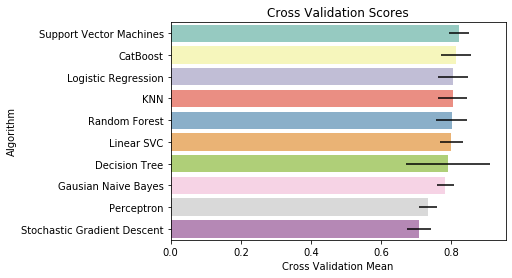

In [ ]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

As we can see, support vector machines has the highest cross validation mean and thus we will proceed with this model.

## 6.3.3 Hyperparameter tuning for SVM

Hyperparameter tuning is the process of tuning the parameters of a model. Here I will tune the parameters of support vector classifier using GridSearchCV.

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.757, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.778, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.727, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.716, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.739, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.814, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.818, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.784, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.761, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.784, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.756, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.830, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.802, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.807, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.784, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.750, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.802, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.807, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.790, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.750, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.830, total=   0.2s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   12.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
# Training accuracy

svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.54

In [ ]:
# Mean cross validation score

cross_val_score(svc, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.8297242083758938

Our mean cross validation score improved slightly.

In [ ]:
# Survival predictions by support vector classifier

Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
len(Y_pred)

418

# 7. Preparing data for submission

In [ ]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
ss.shape

(418, 2)

We want our submission dataframe to have 418 rows and 2 columns, PassengerId and Survived. 

In [ ]:
# Create submission dataframe

submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.head()

,PassengerId,Survived
881,892,0
882,893,0
883,894,0
884,895,0
885,896,1


In [ ]:
submit.shape

(418, 2)

Our dataframe is ready for submission!

In [ ]:
# Create and save csv file 

submit.to_csv("C:/Users/Jason Chong/Documents/Kaggle/titanic/svm_titanic.csv", index = False)

# 8. Possible extensions to improve model accuracy

1. Analyse ticket and cabin features
    - Do these features help predict passenger survival?
    - If yes, consider including them in the training set instead of dropping
2. Come up with alternative features in feature engineering
    - Is there any other features you can potentially create from existing features in the dataset
3. Remove features that are less important
    - Does removing features help reduce overfitting in the model?
4. Ensemble modelling
    - This is a more advanced technique whereby you combine prediction results from multiple machine learning models

# 9. Conclusion

You should achieve a submission score of 0.77511 if you follow exactly what I have done in this notebook. In other words, I have correctly predicted 77.5% of the test set. I highly encourage you to work through this project again and see if you can improve on this result.

If you found any mistakes in the notebook or places where I can potentially improve on, feel free to reach out to me. Let's help each other get better - happy learning!

My platforms: 
- [Facebook](https://www.facebook.com/chongjason914)
- [Instagram](https://www.instagram.com/chongjason914)
- [Twitter](https://www.twitter.com/chongjason914)
- [LinkedIn](https://www.linkedin.com/in/chongjason914)
- [YouTube](https://www.youtube.com/channel/UCQXiCnjatxiAKgWjoUlM-Xg?view_as=subscriber)
- [Medium](https://www.medium.com/@chongjason)